<a href="https://colab.research.google.com/github/Kaneshy/serie-medium/blob/master/model_cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"  ];
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df["class"] = (df["class"] == "g").astype(int)

In [8]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

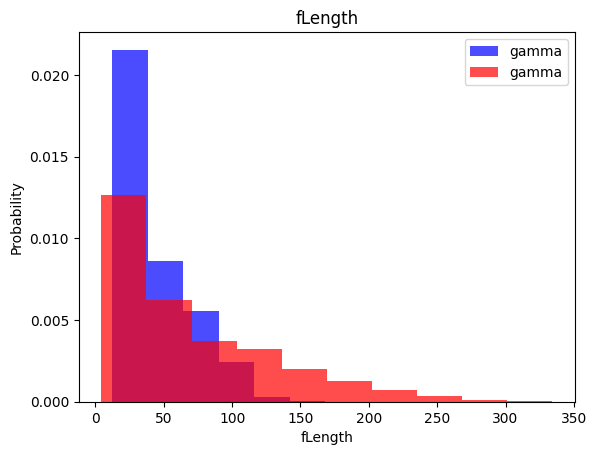

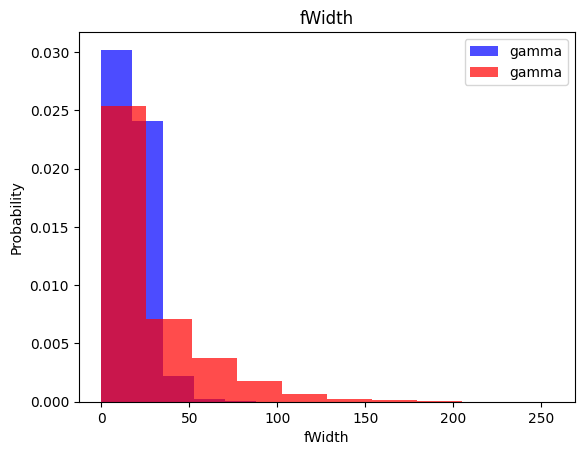

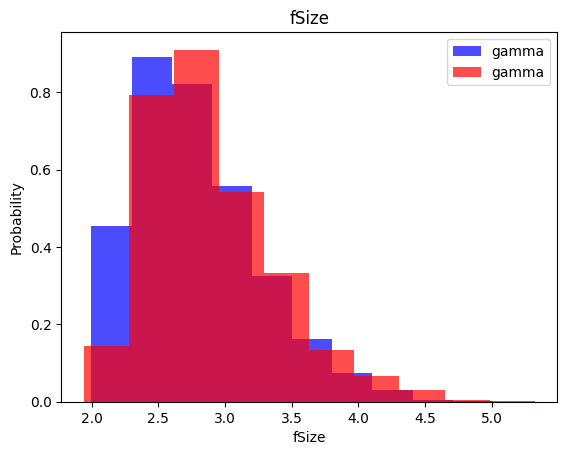

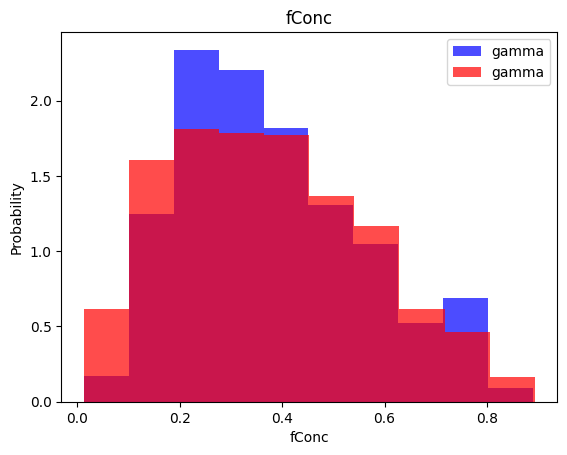

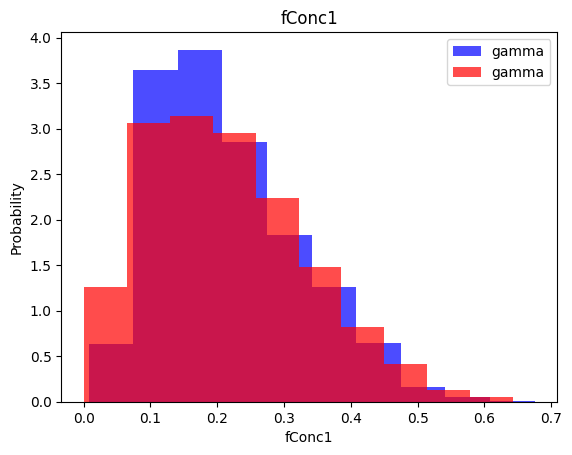

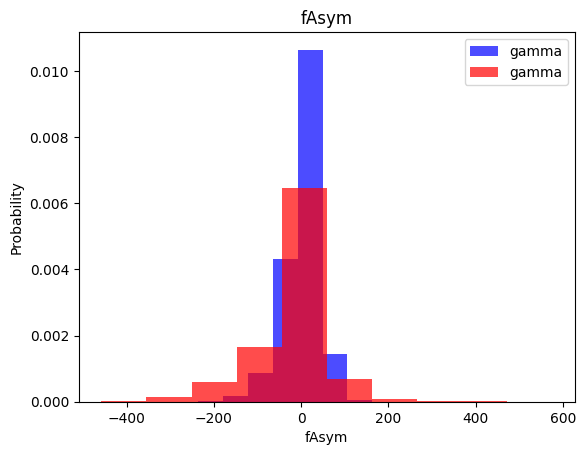

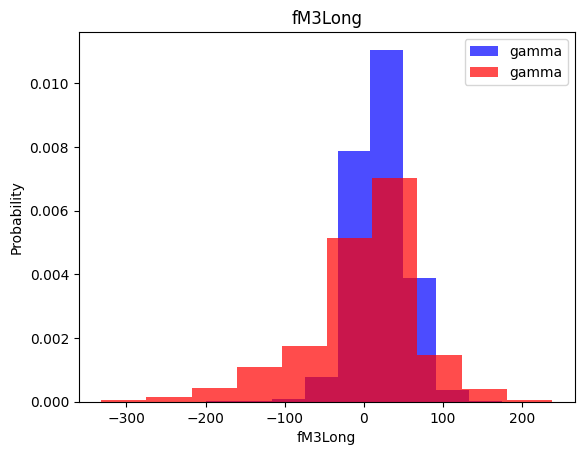

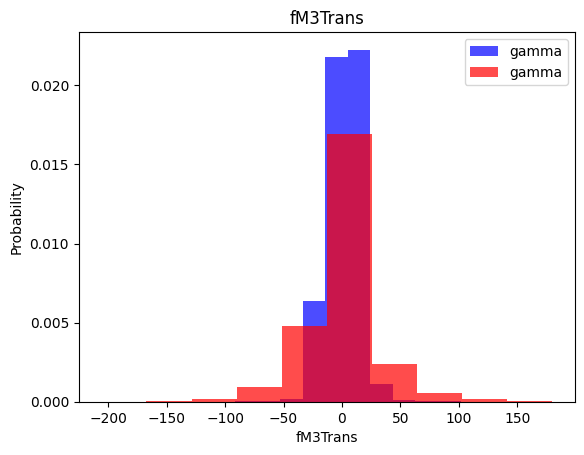

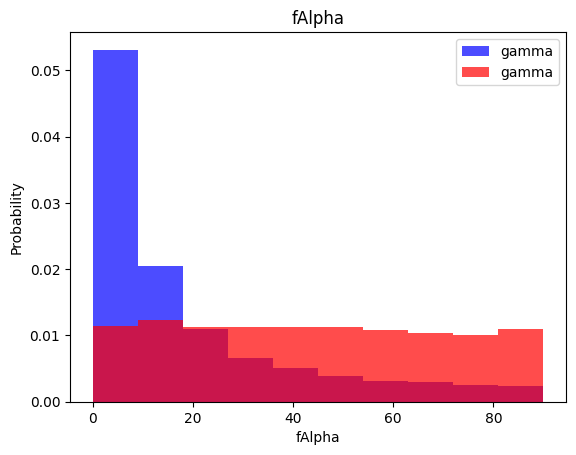

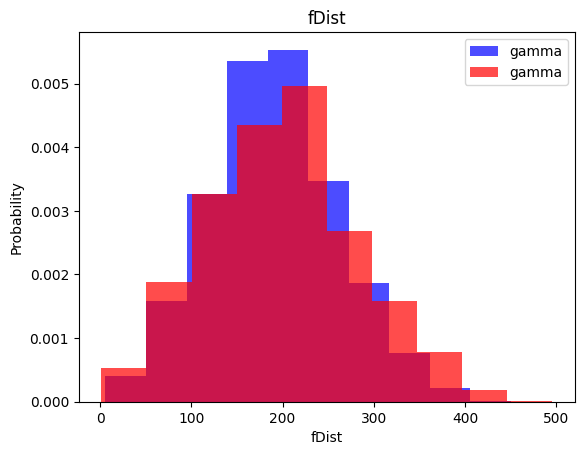

In [9]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='gamma', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets


In [23]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [18]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [13]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #gamma


7429
3983


In [24]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [20]:
len(y_train)

14858

In [21]:
sum(y_train == 0)

7429

In [22]:
sum(y_train == 1)

7429

K nearest neigbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn_model.predict(X_test)

In [28]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [29]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1377
           1       0.83      0.89      0.86      2427

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [39]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.39      0.49      1377
           1       0.72      0.89      0.80      2427

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [43]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1377
           1       0.83      0.83      0.83      2427

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.78      0.78      0.78      3804



SVM

In [44]:
from sklearn.svm import SVC

In [45]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [46]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1377
           1       0.88      0.89      0.89      2427

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



Neural Net

In [48]:
import tensorflow as tf

In [64]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 8))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()



In [55]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                 metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


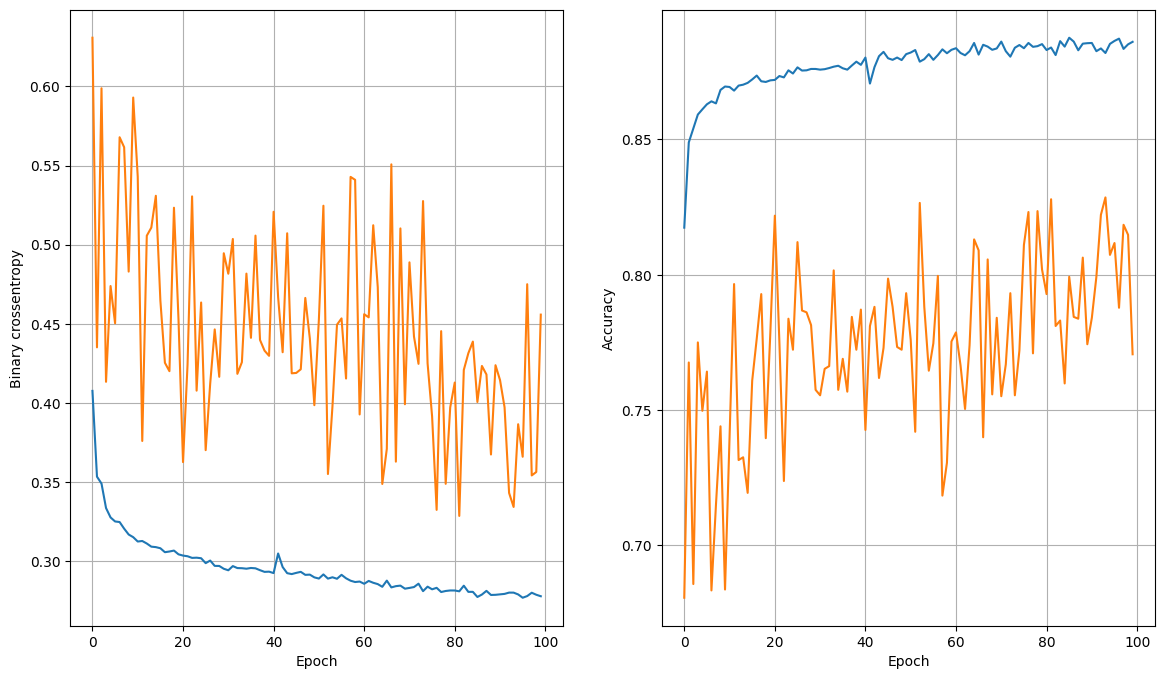

156/156 [==============================] - 1s 3ms/step - loss: 0.3605 - accuracy: 0.8474
<class 'list'>
16 nodes, dropout 0, lr 0.01, batch size 64


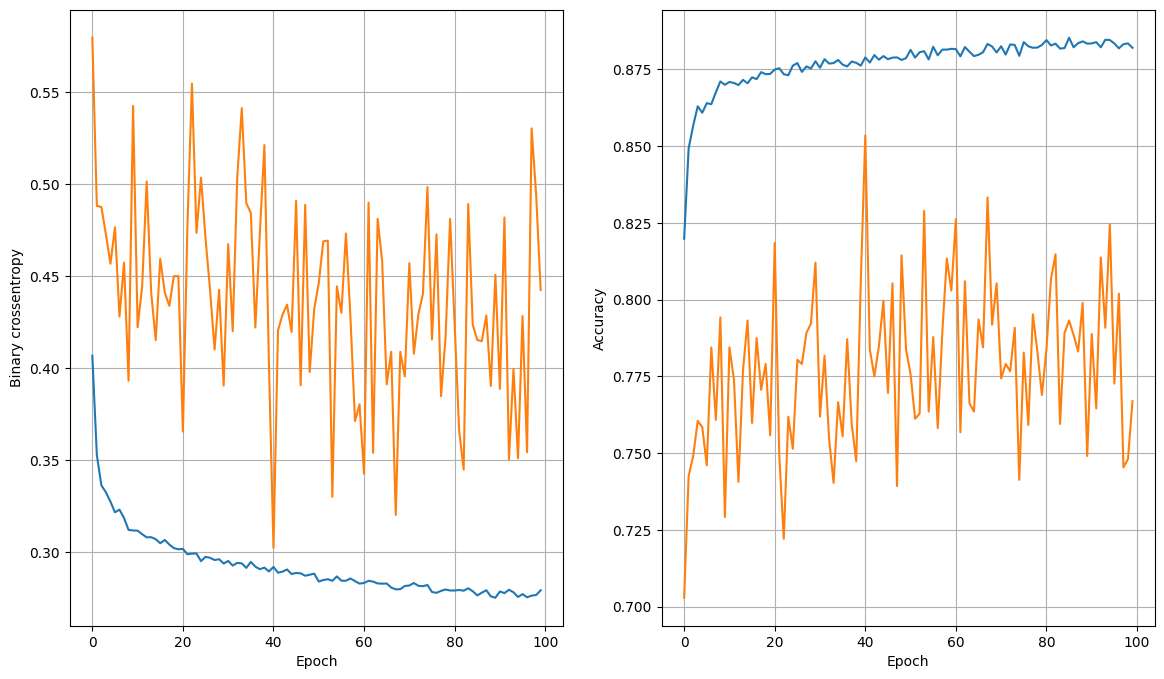

156/156 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8492
<class 'list'>
16 nodes, dropout 0, lr 0.01, batch size 128


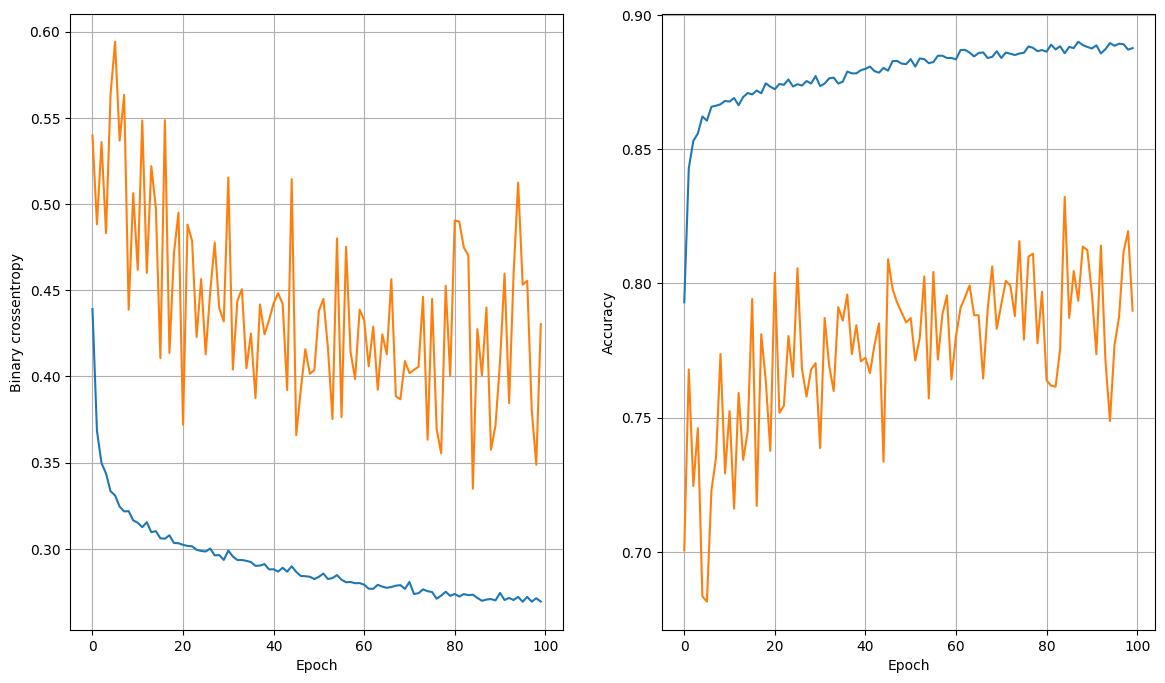

156/156 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8523
<class 'list'>
16 nodes, dropout 0, lr 0.005, batch size 32


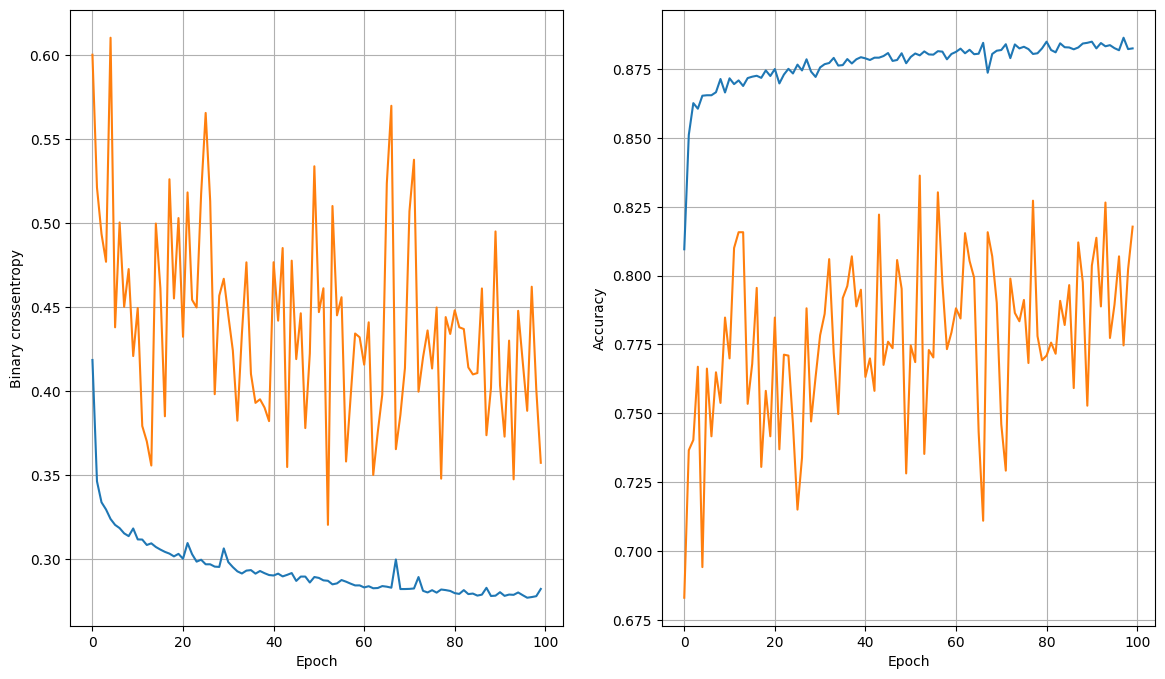

156/156 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8559
<class 'list'>
16 nodes, dropout 0, lr 0.005, batch size 64


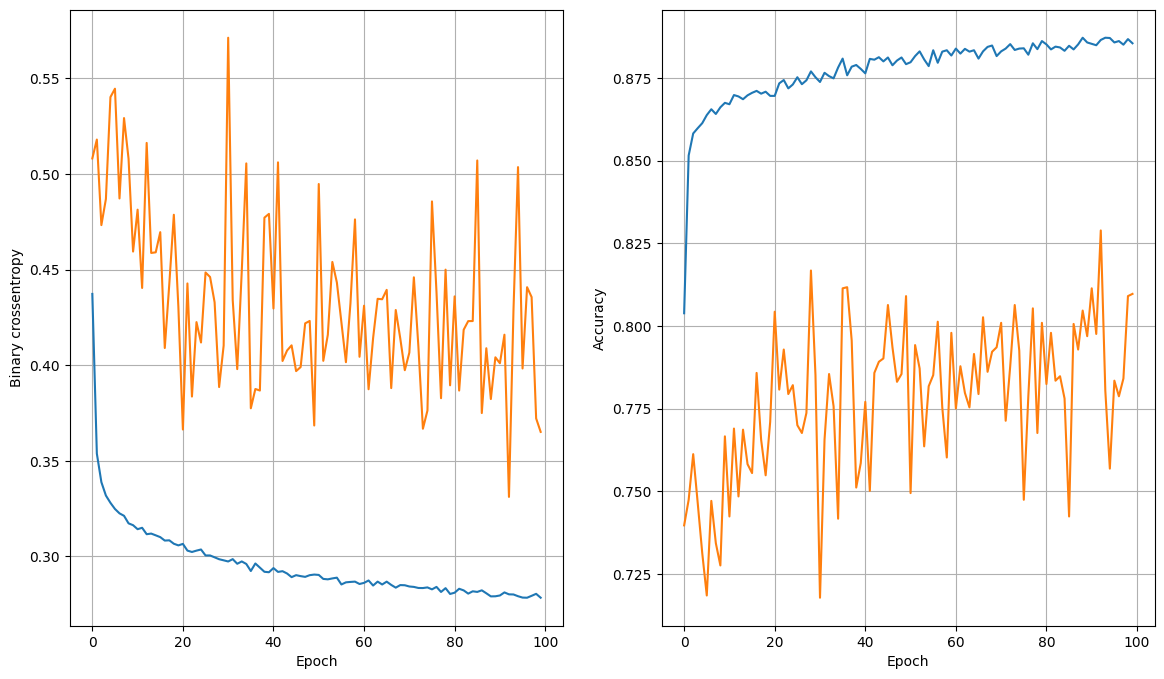

156/156 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8597
<class 'list'>
16 nodes, dropout 0, lr 0.005, batch size 128


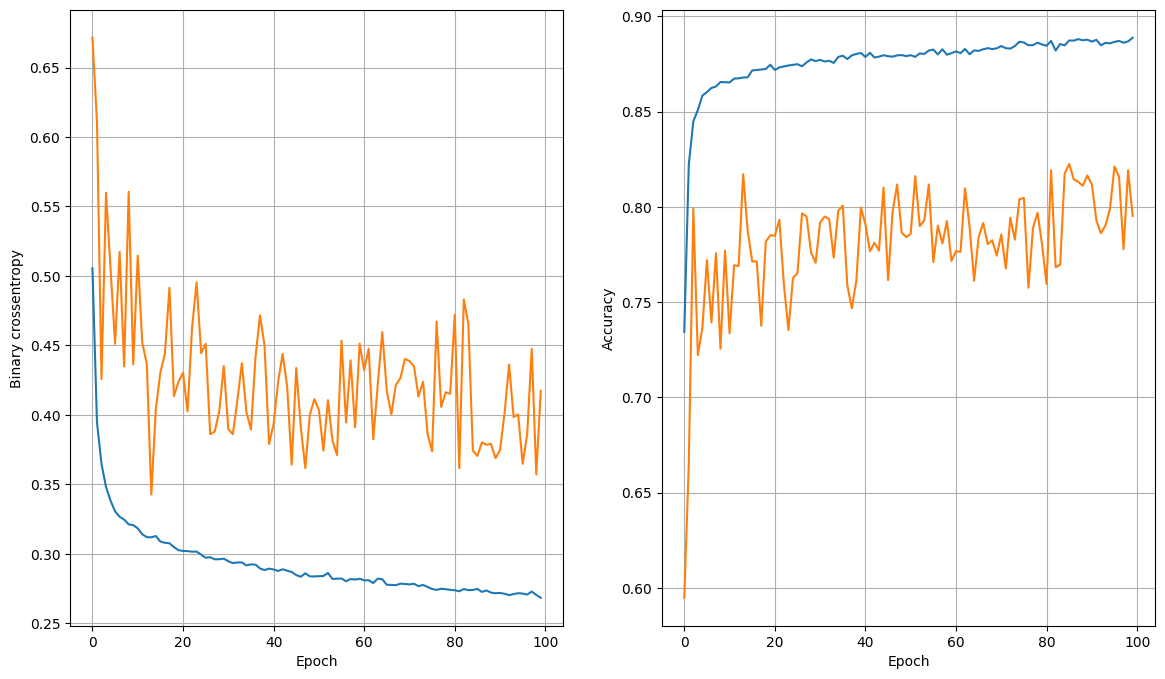

156/156 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8537
<class 'list'>
16 nodes, dropout 0, lr 0.001, batch size 32


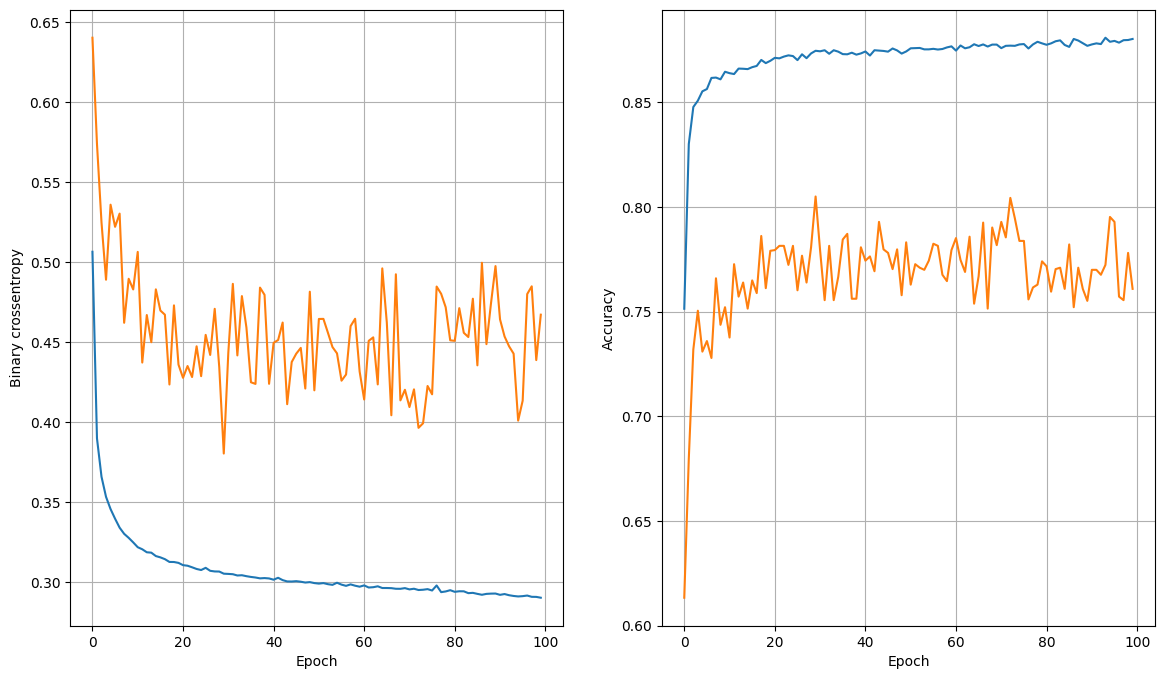

156/156 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.8434
<class 'list'>
16 nodes, dropout 0, lr 0.001, batch size 64


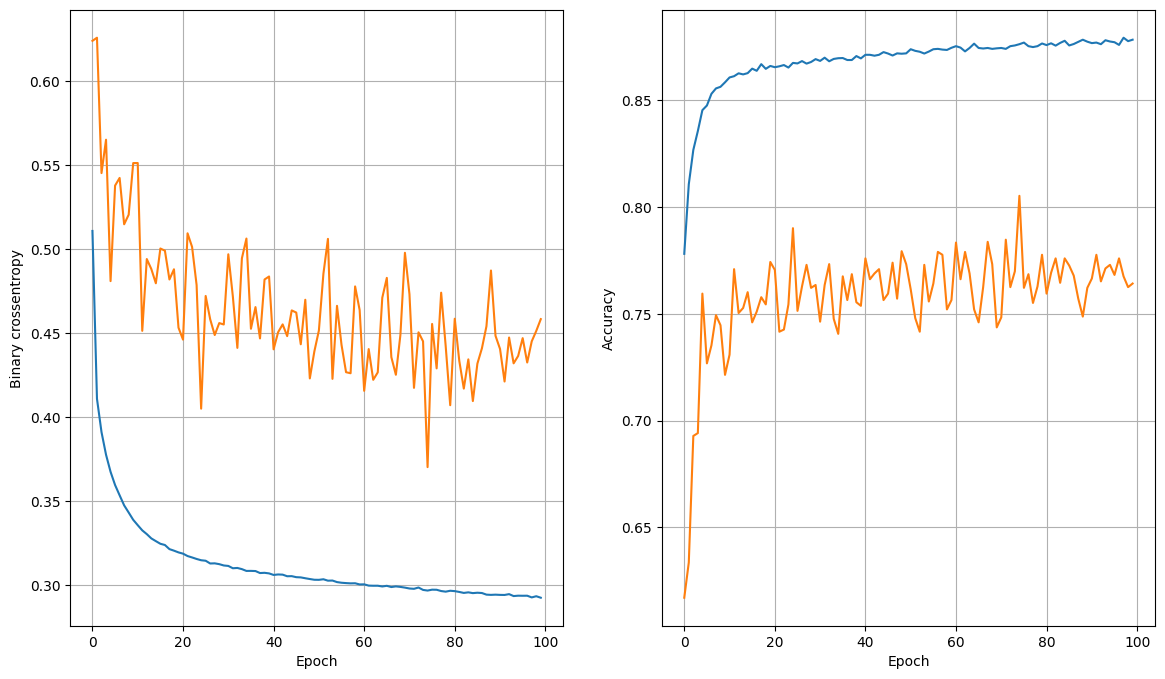

156/156 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8436
<class 'list'>
16 nodes, dropout 0, lr 0.001, batch size 128


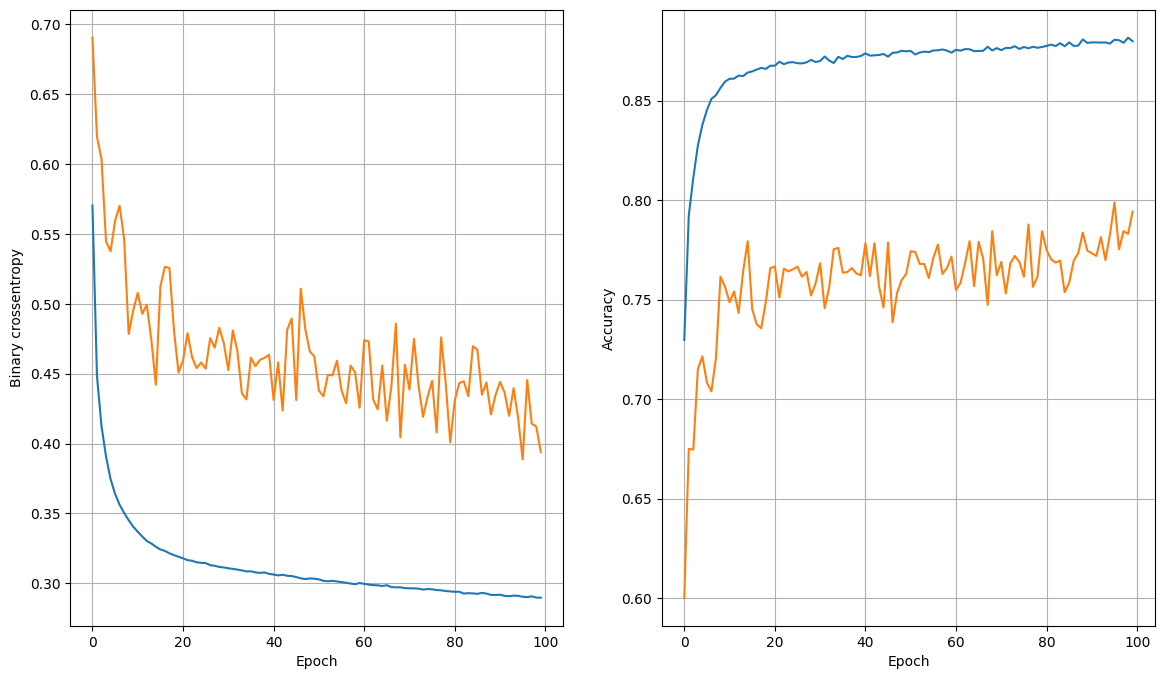

156/156 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8448
<class 'list'>
16 nodes, dropout 0.2, lr 0.01, batch size 32


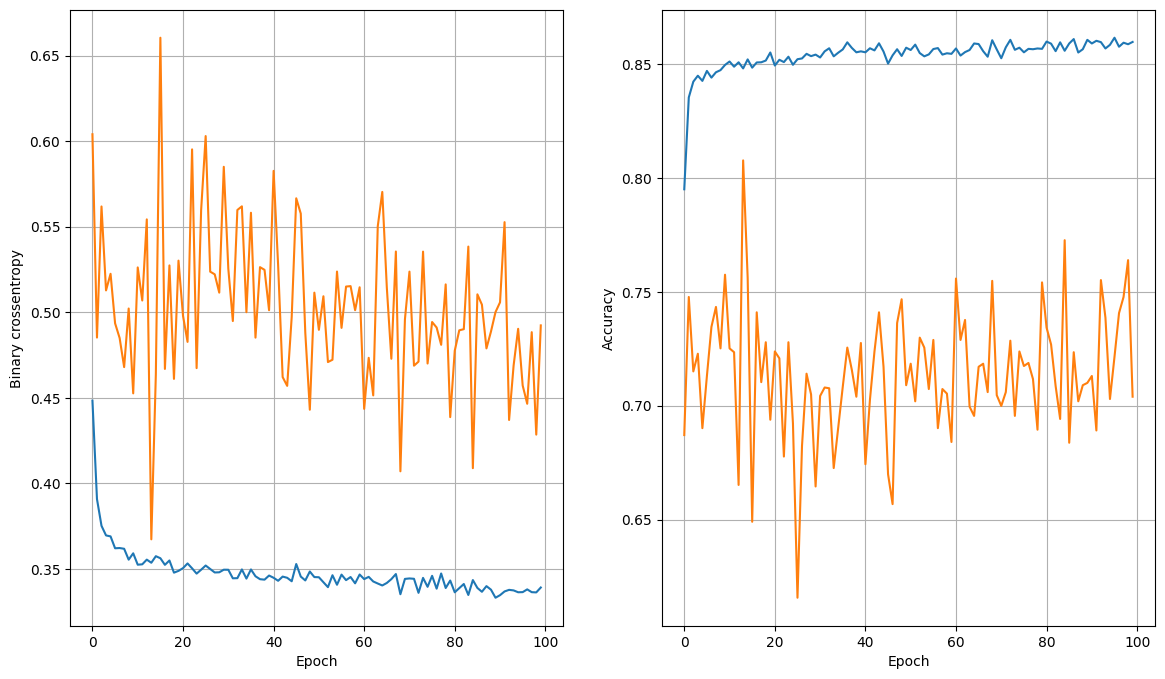

156/156 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8243
<class 'list'>
16 nodes, dropout 0.2, lr 0.01, batch size 64


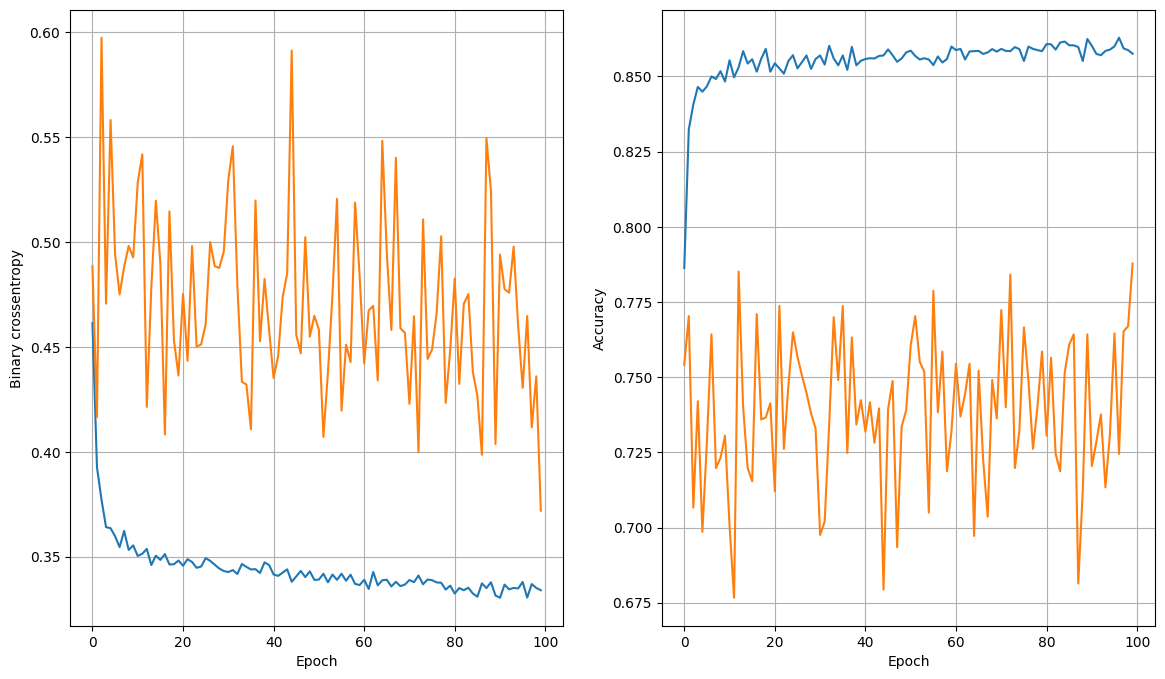

156/156 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8525
<class 'list'>
16 nodes, dropout 0.2, lr 0.01, batch size 128


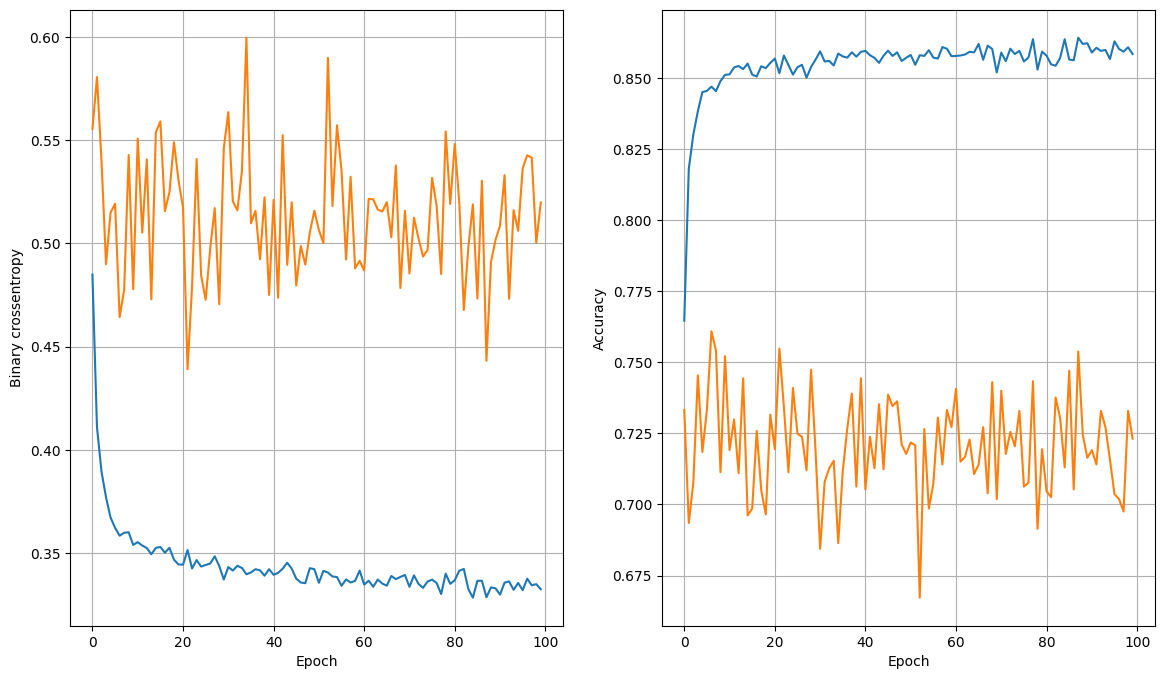

156/156 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8287
<class 'list'>
16 nodes, dropout 0.2, lr 0.005, batch size 32


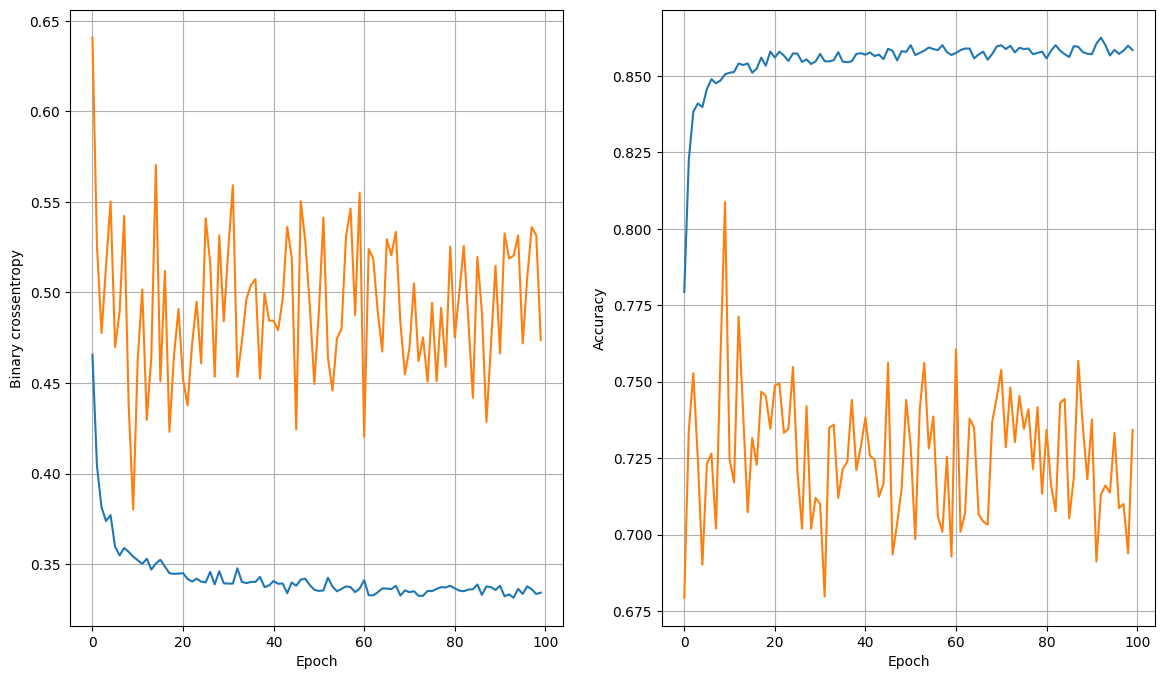

156/156 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8392
<class 'list'>
16 nodes, dropout 0.2, lr 0.005, batch size 64


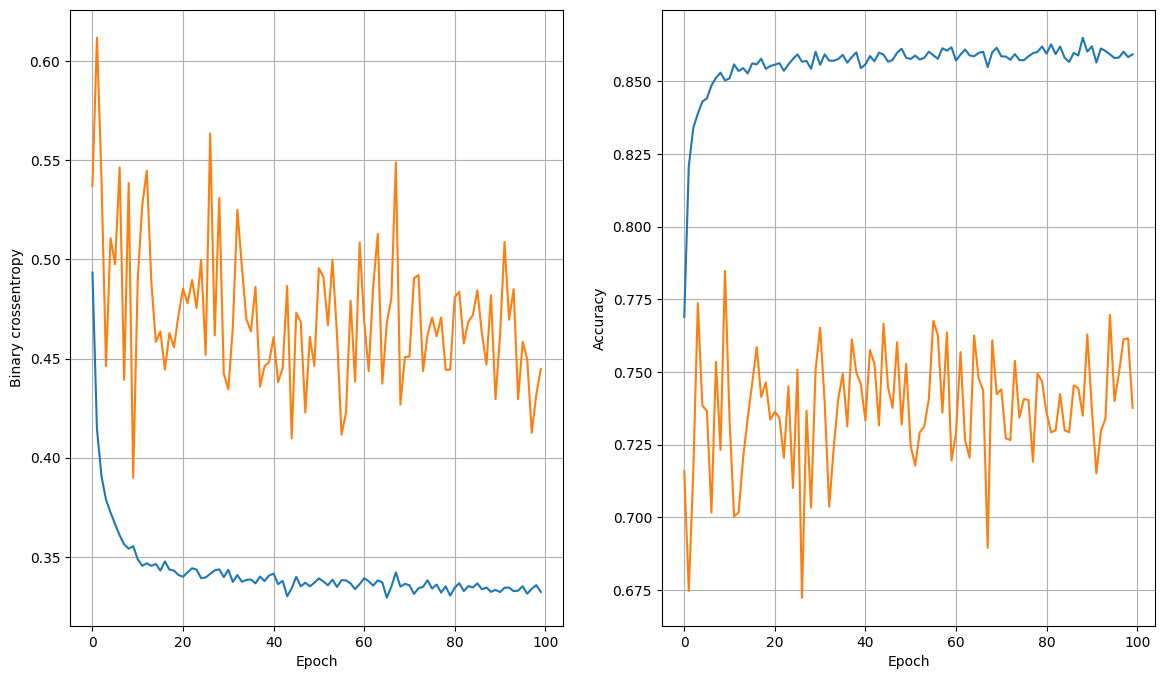

156/156 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8410
<class 'list'>
16 nodes, dropout 0.2, lr 0.005, batch size 128


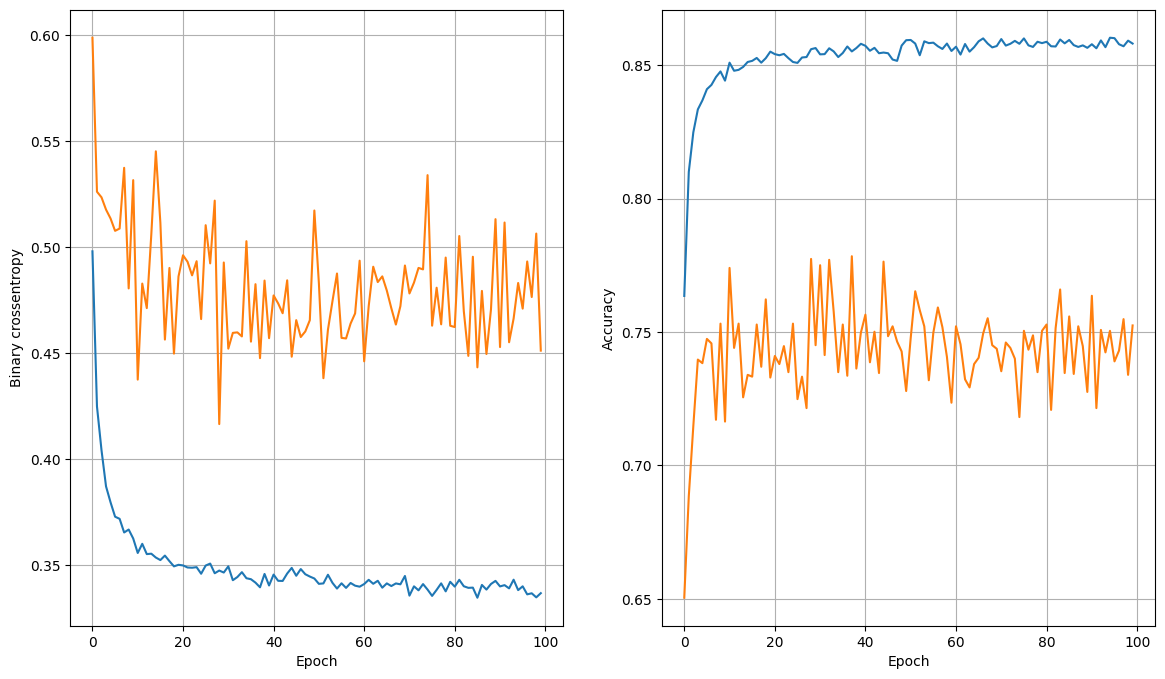

156/156 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8470
<class 'list'>
16 nodes, dropout 0.2, lr 0.001, batch size 32


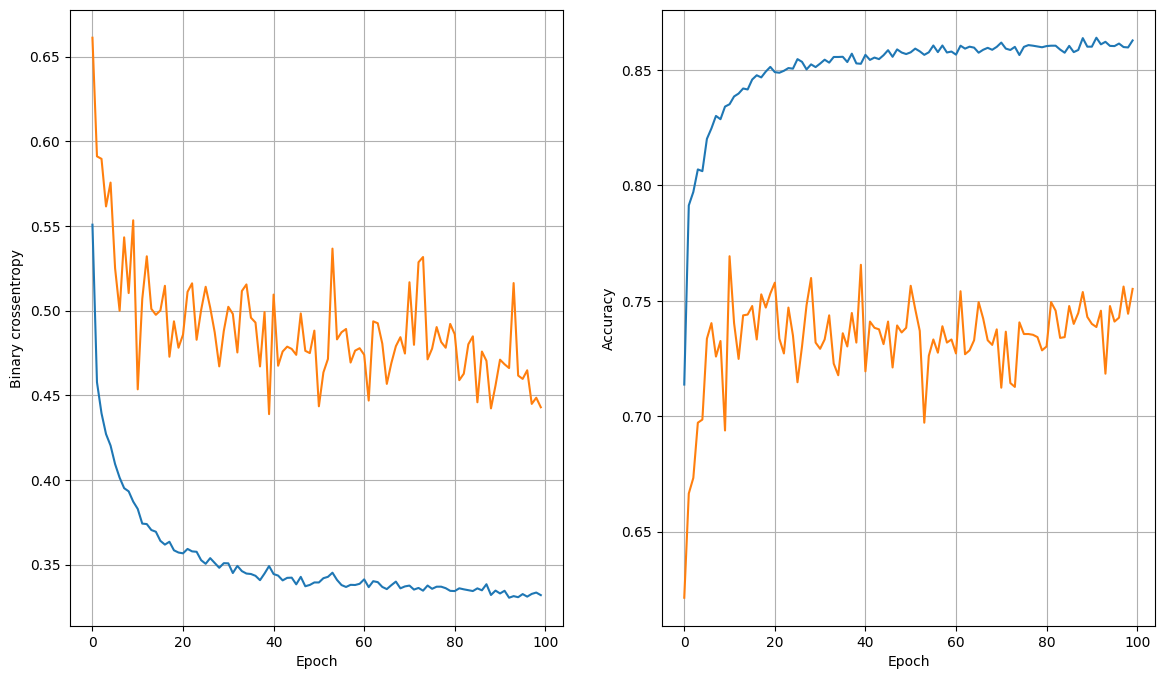

156/156 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8404
<class 'list'>
16 nodes, dropout 0.2, lr 0.001, batch size 64


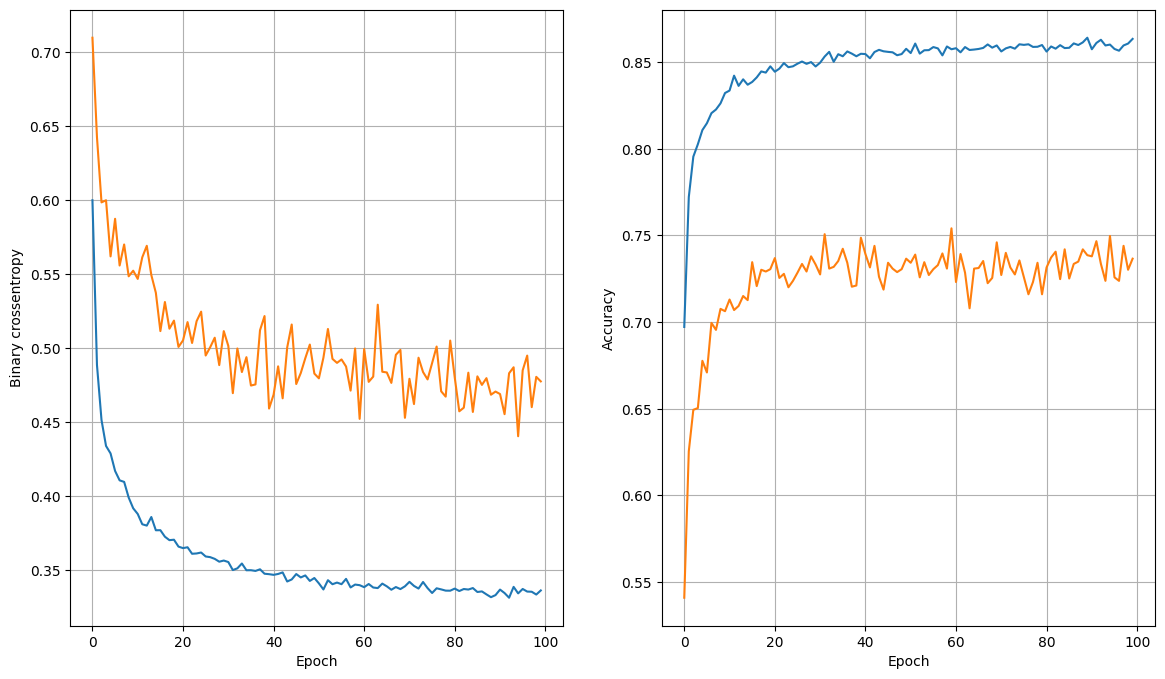

156/156 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8386
<class 'list'>
16 nodes, dropout 0.2, lr 0.001, batch size 128


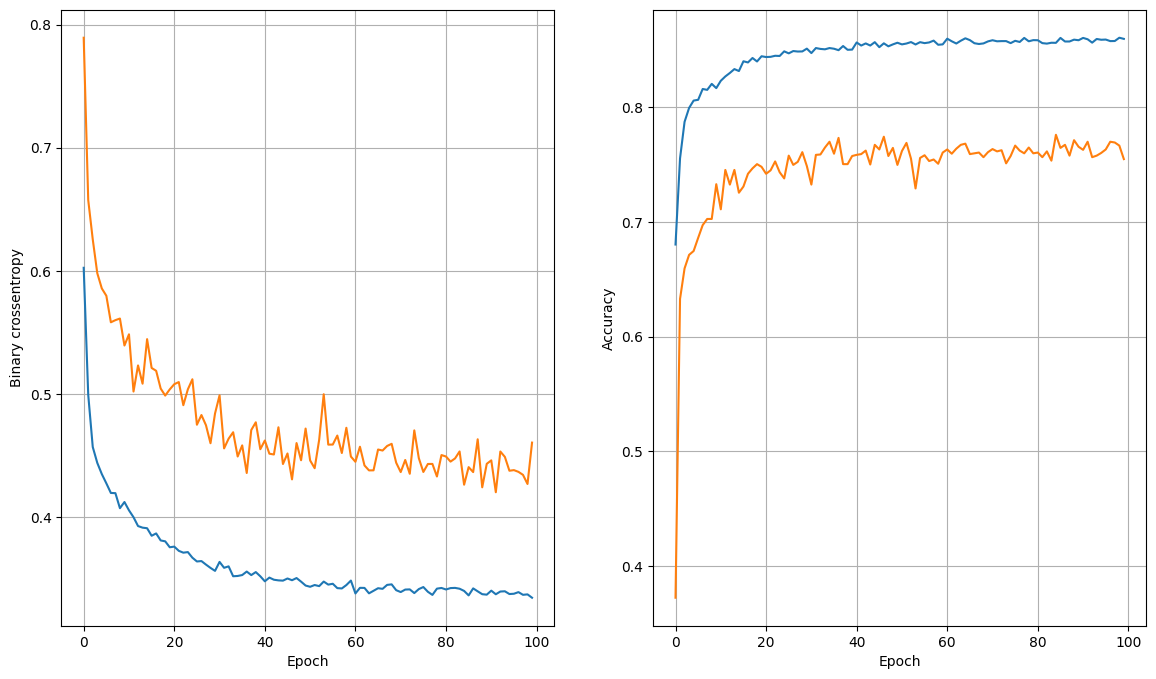

156/156 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8432
<class 'list'>
32 nodes, dropout 0, lr 0.01, batch size 32


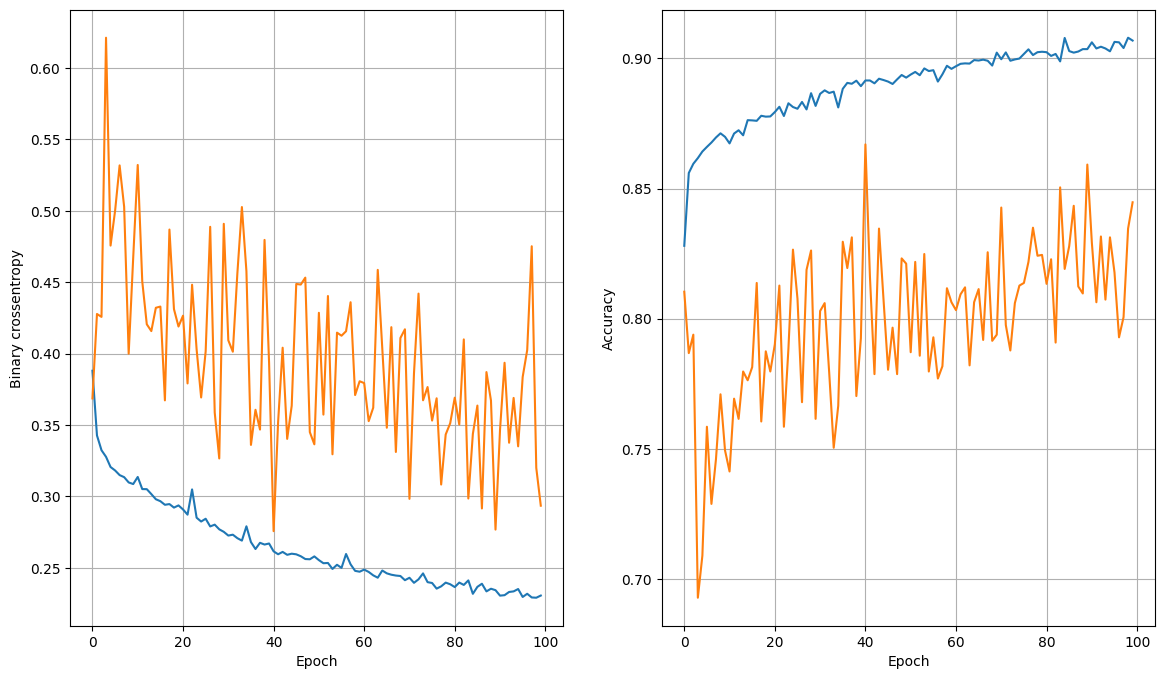

156/156 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8504
<class 'list'>
32 nodes, dropout 0, lr 0.01, batch size 64


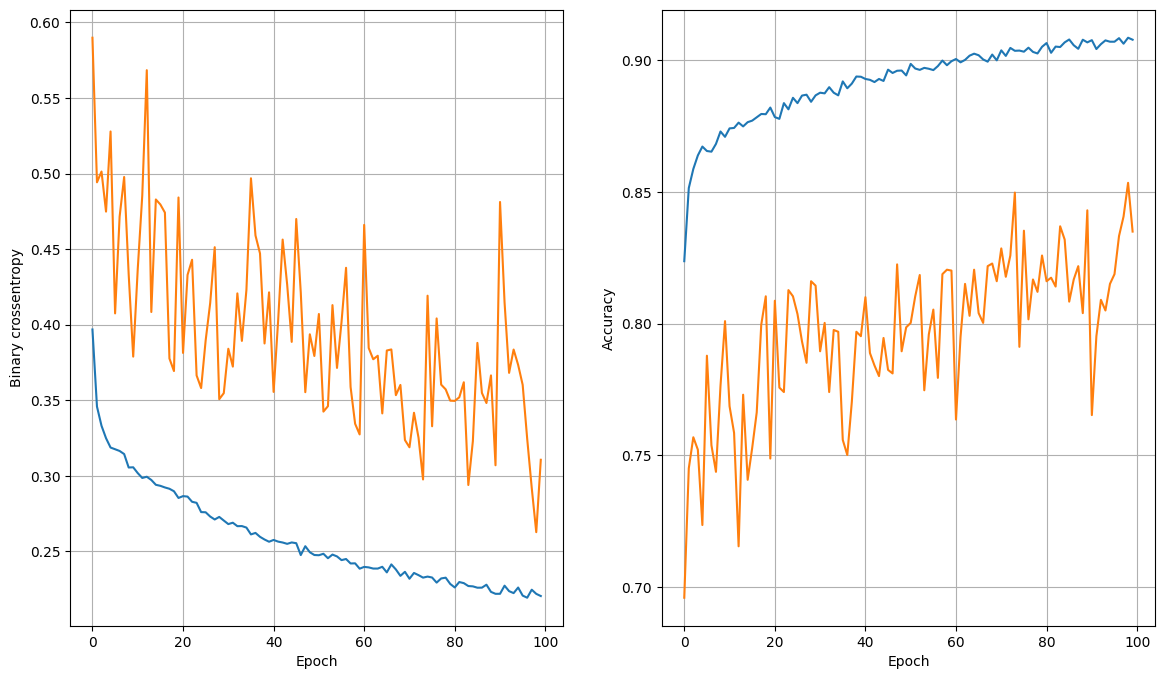

156/156 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8474
<class 'list'>
32 nodes, dropout 0, lr 0.01, batch size 128


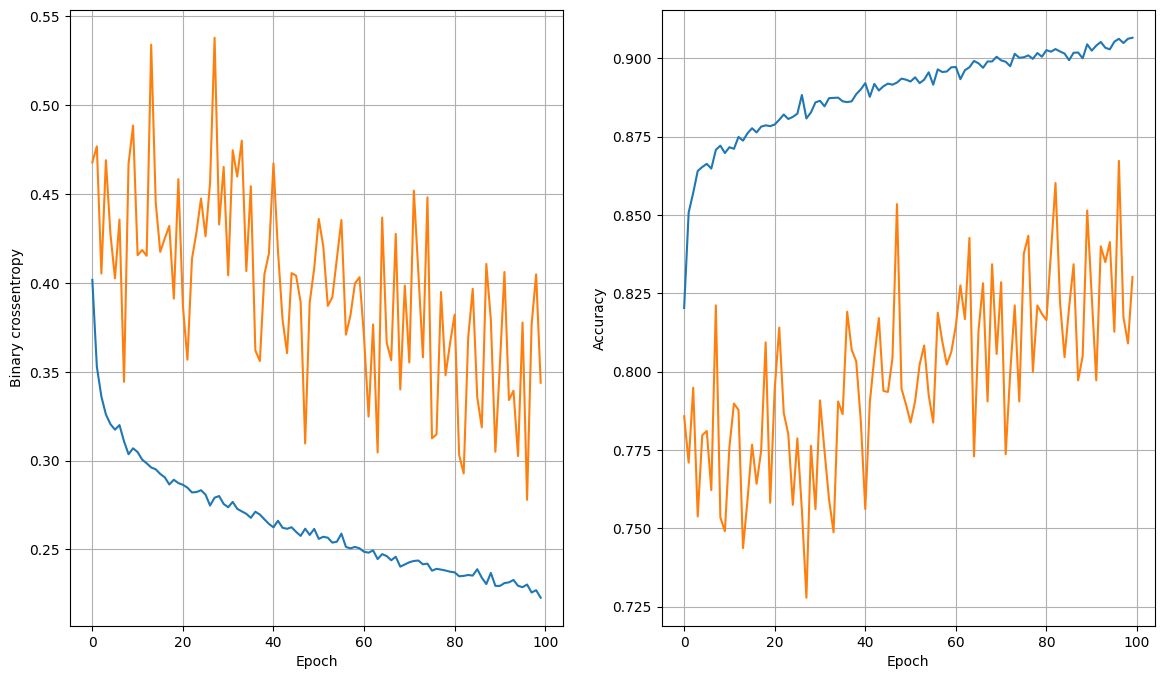

156/156 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8492
<class 'list'>
32 nodes, dropout 0, lr 0.005, batch size 32


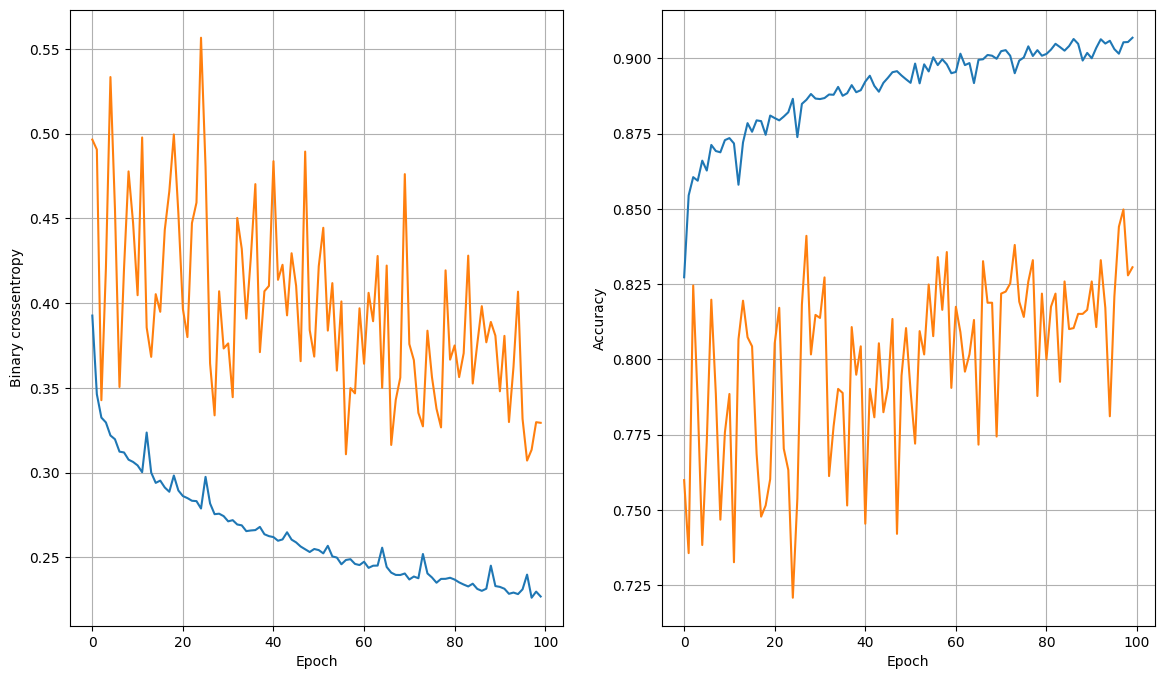

156/156 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8537
<class 'list'>
32 nodes, dropout 0, lr 0.005, batch size 64


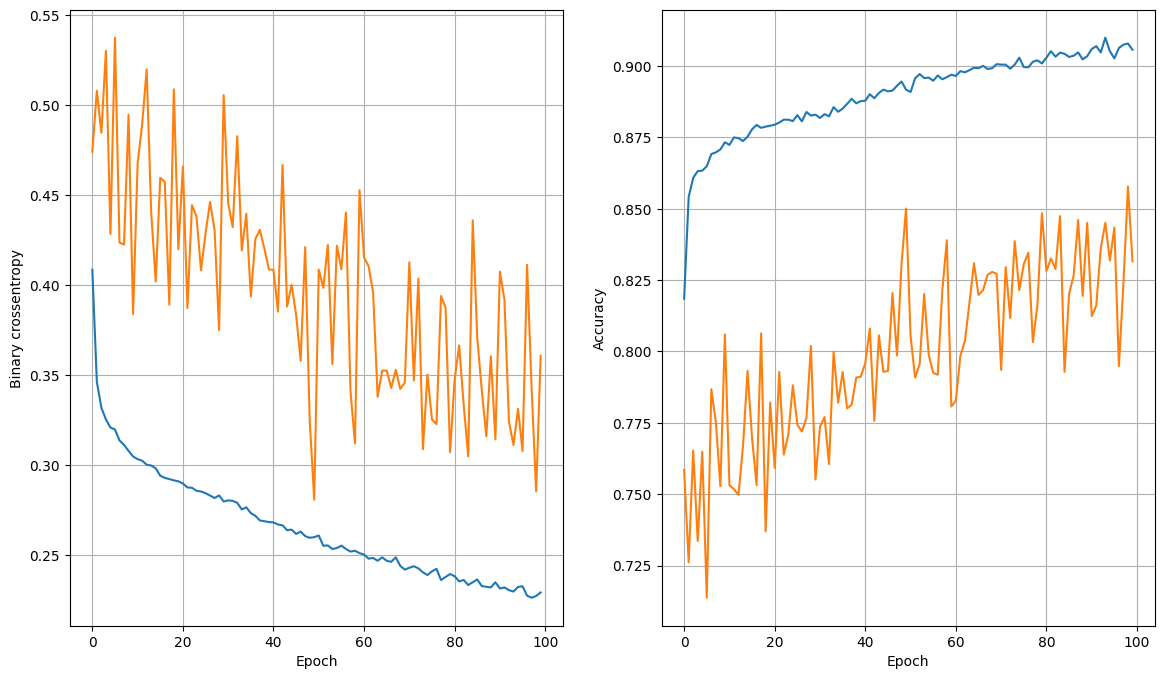

156/156 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8486
<class 'list'>
32 nodes, dropout 0, lr 0.005, batch size 128


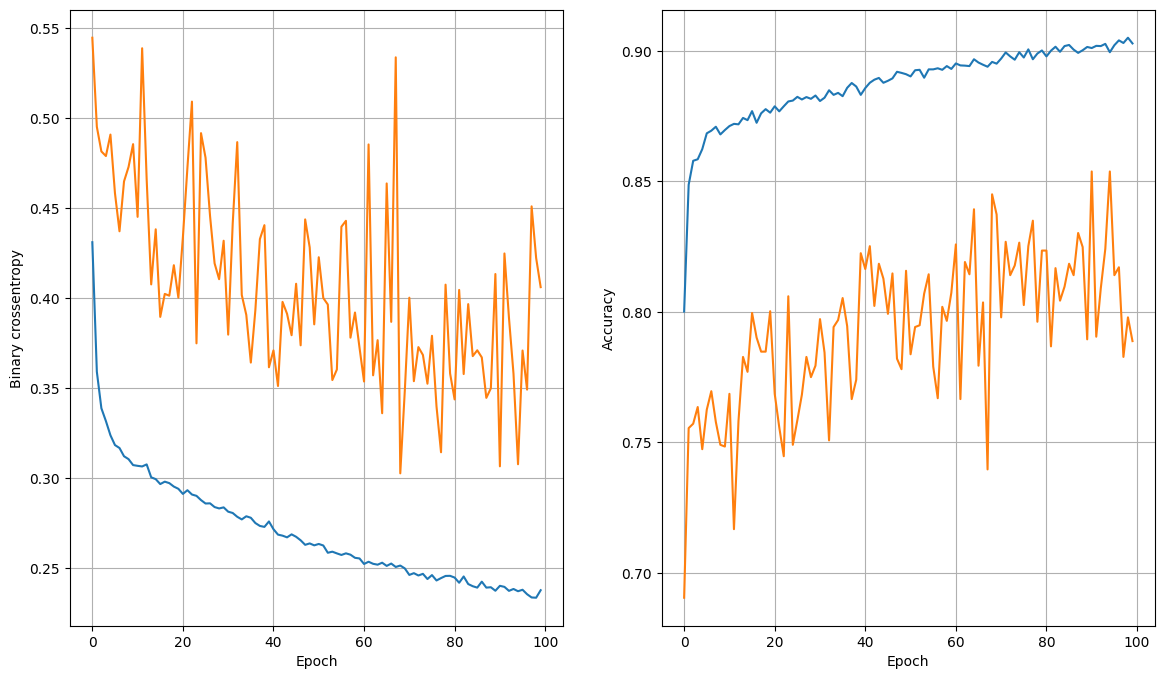

156/156 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8422
<class 'list'>
32 nodes, dropout 0, lr 0.001, batch size 32


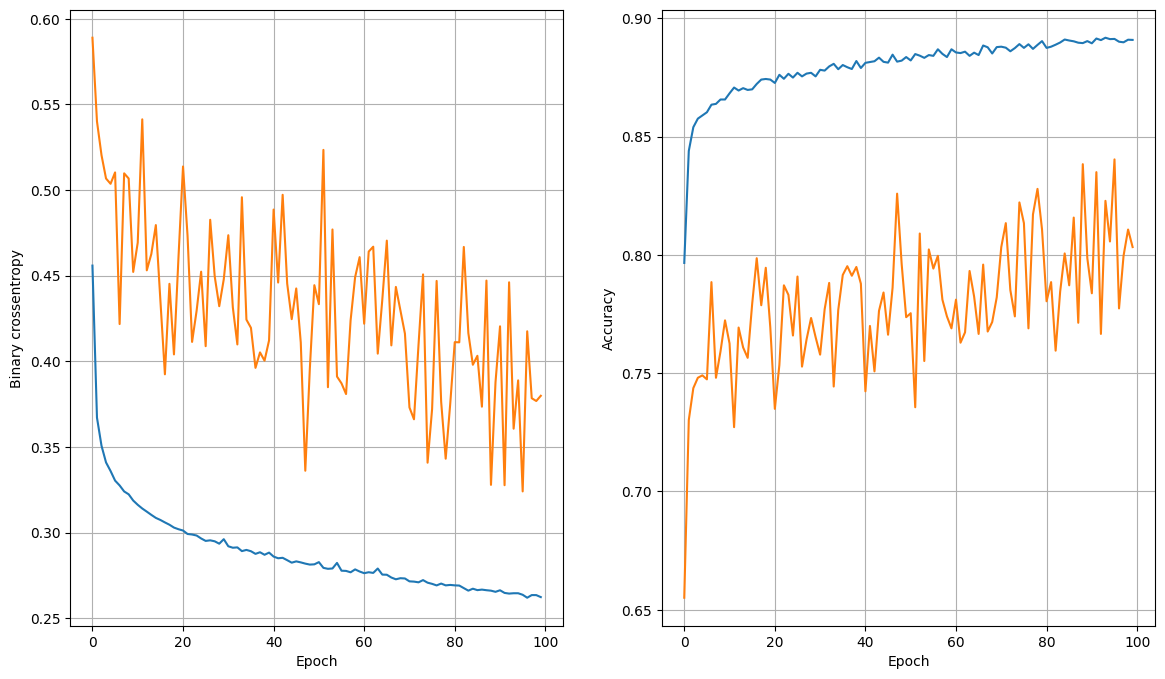

156/156 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8454
<class 'list'>
32 nodes, dropout 0, lr 0.001, batch size 64


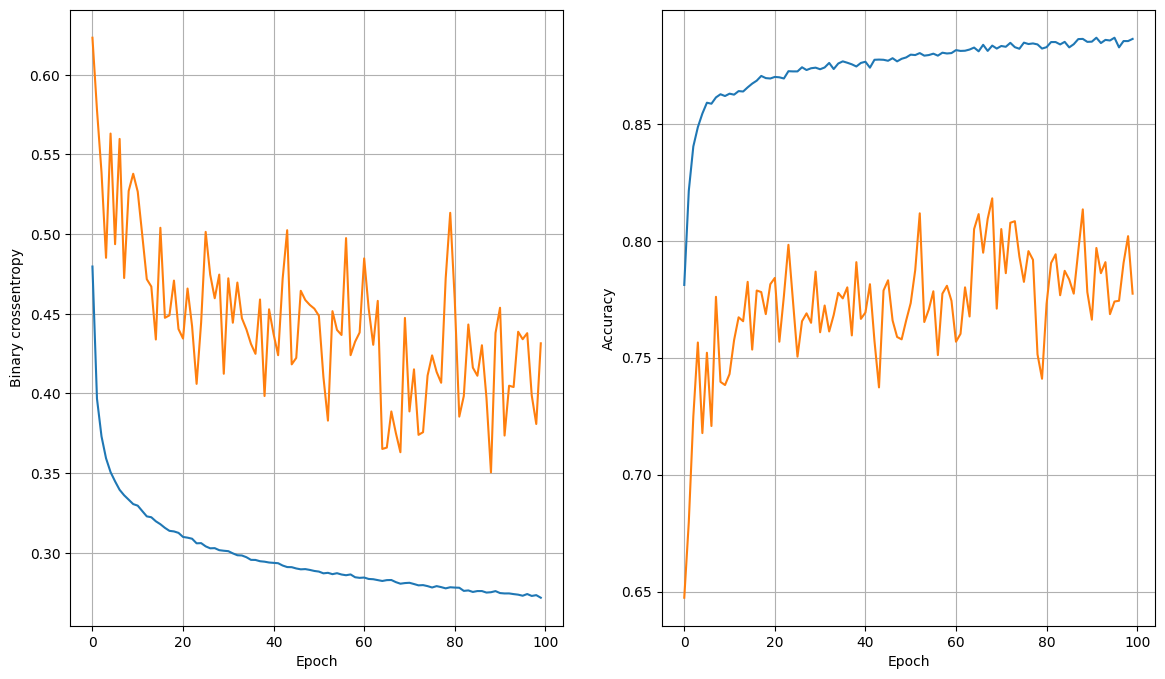

156/156 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.8549
<class 'list'>
32 nodes, dropout 0, lr 0.001, batch size 128


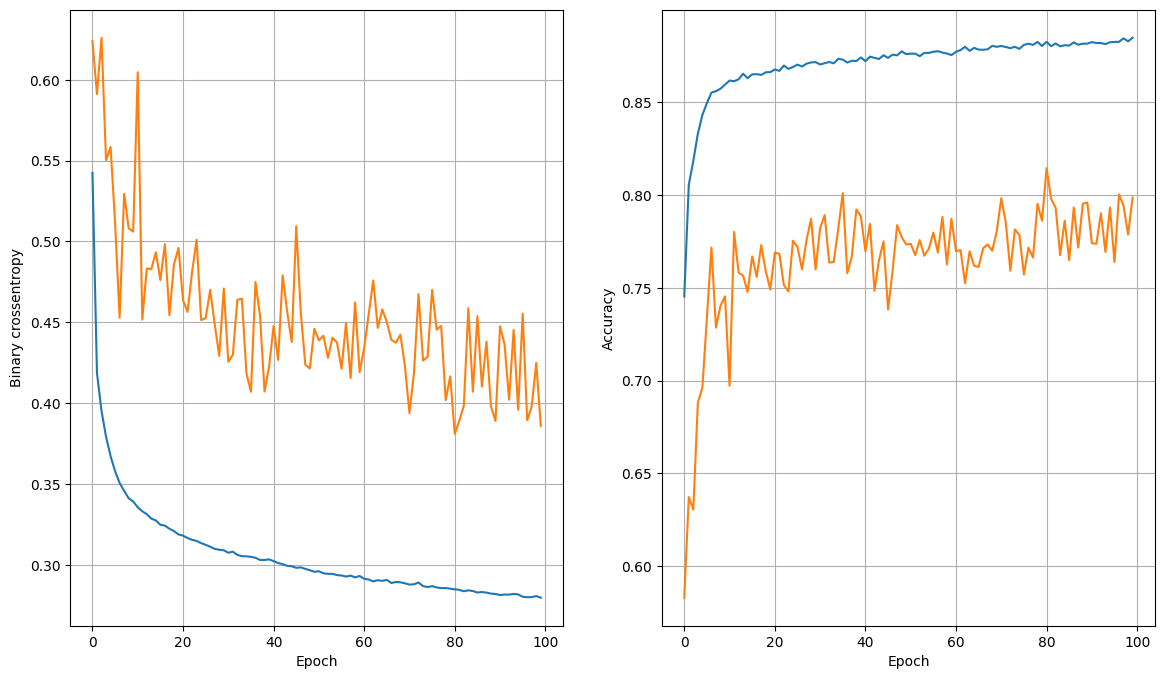

156/156 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8525
<class 'list'>
32 nodes, dropout 0.2, lr 0.01, batch size 32


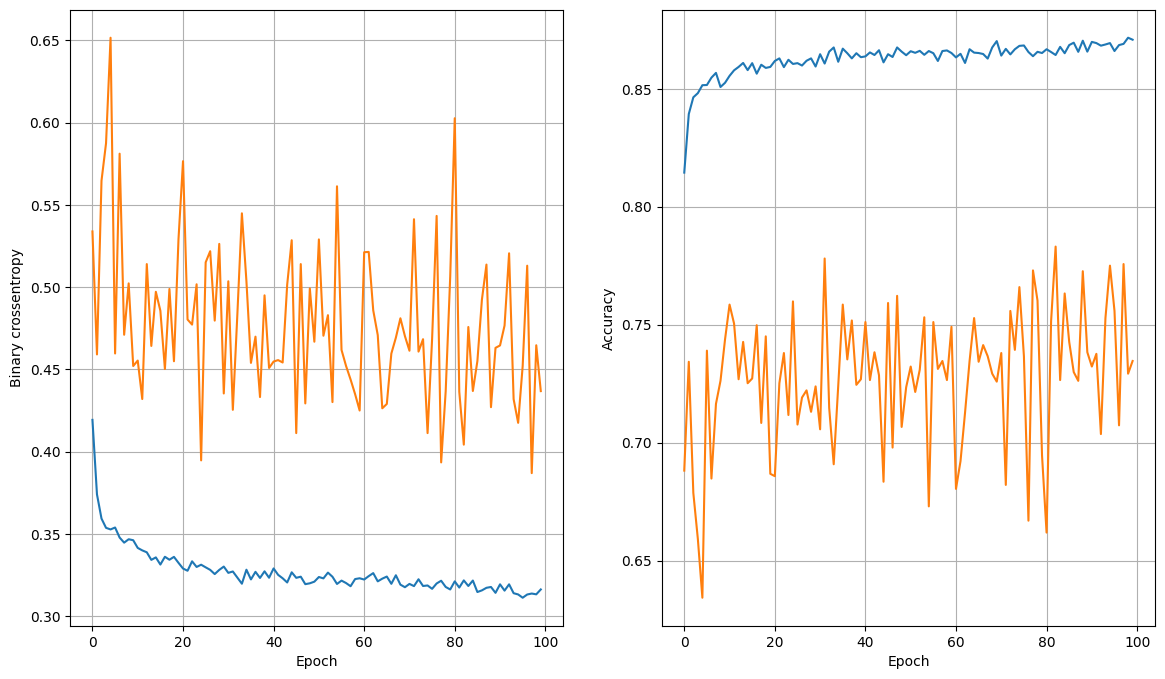

156/156 [==============================] - 1s 4ms/step - loss: 0.3571 - accuracy: 0.8275
<class 'list'>
32 nodes, dropout 0.2, lr 0.01, batch size 64


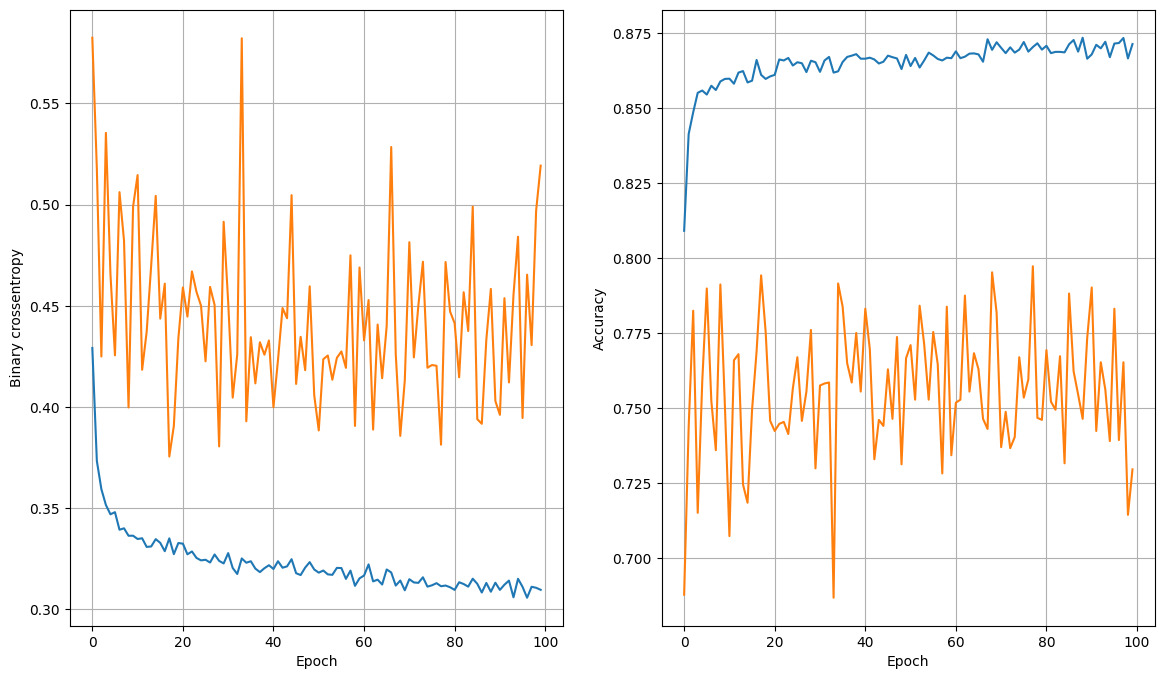

156/156 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8287
<class 'list'>
32 nodes, dropout 0.2, lr 0.01, batch size 128


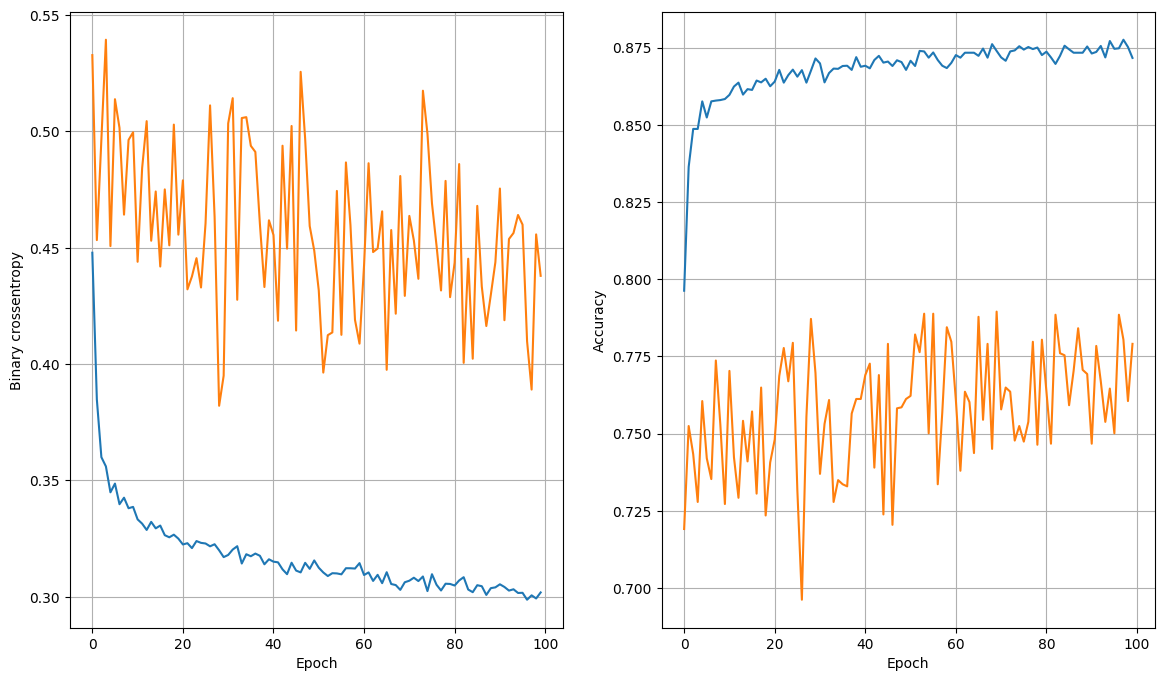

156/156 [==============================] - 1s 3ms/step - loss: 0.3454 - accuracy: 0.8541
<class 'list'>
32 nodes, dropout 0.2, lr 0.005, batch size 32


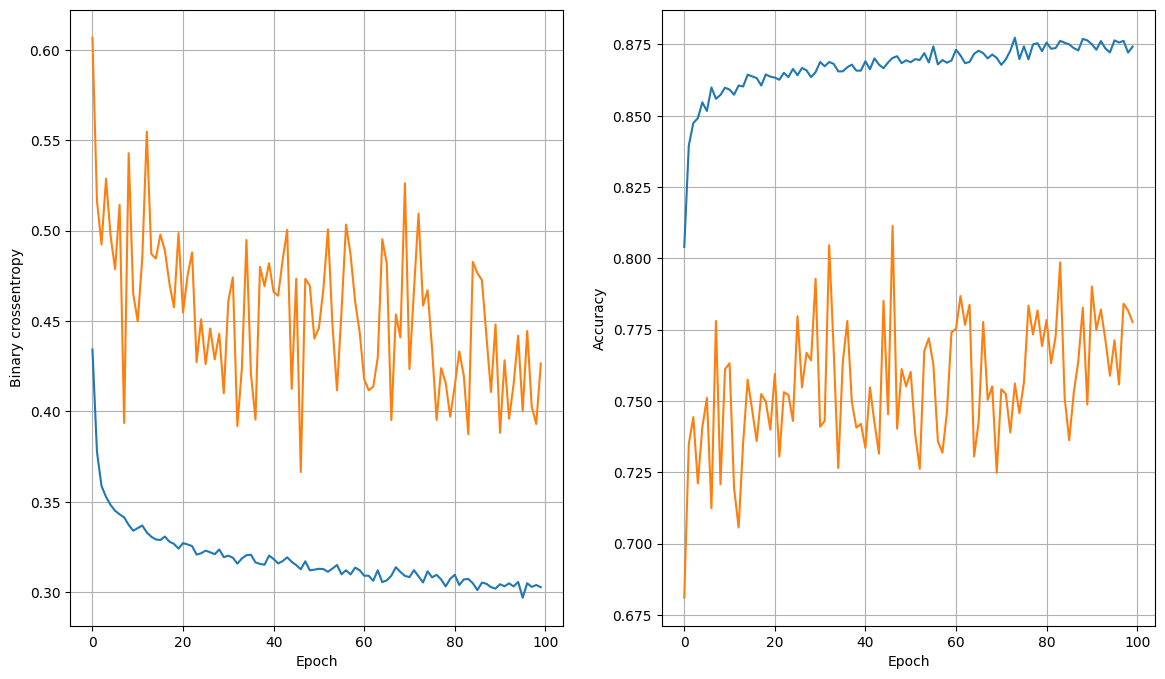

156/156 [==============================] - 1s 4ms/step - loss: 0.3444 - accuracy: 0.8492
<class 'list'>
32 nodes, dropout 0.2, lr 0.005, batch size 64


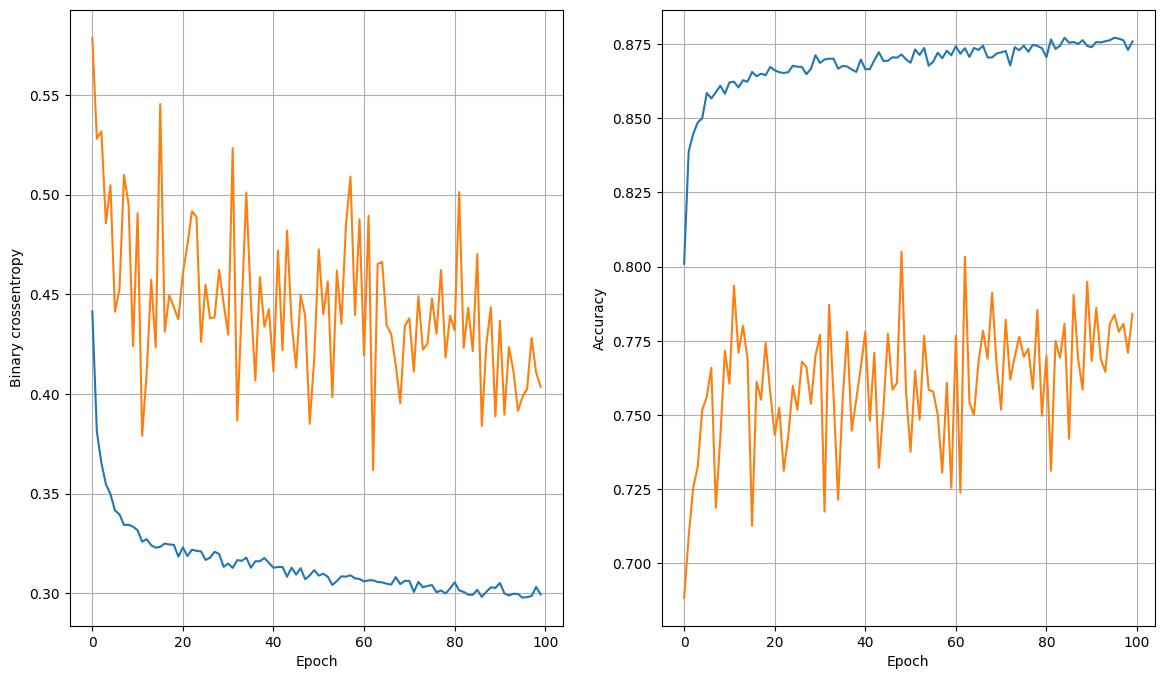

156/156 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 0.8422
<class 'list'>
32 nodes, dropout 0.2, lr 0.005, batch size 128


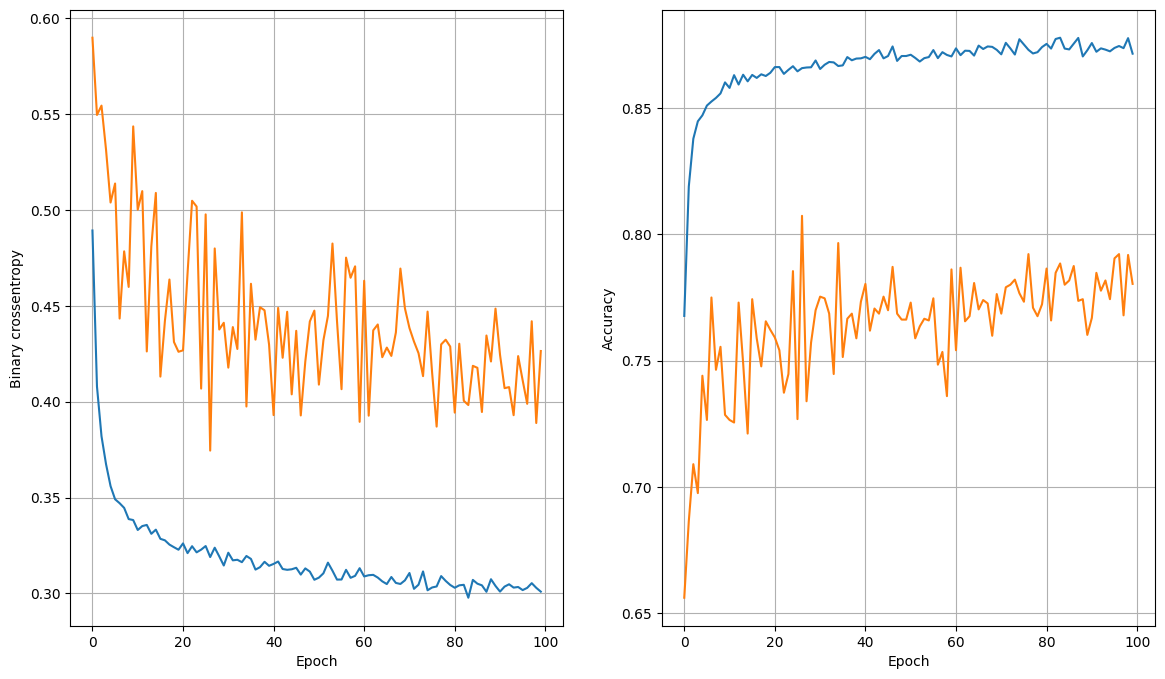

156/156 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.8547
<class 'list'>
32 nodes, dropout 0.2, lr 0.001, batch size 32


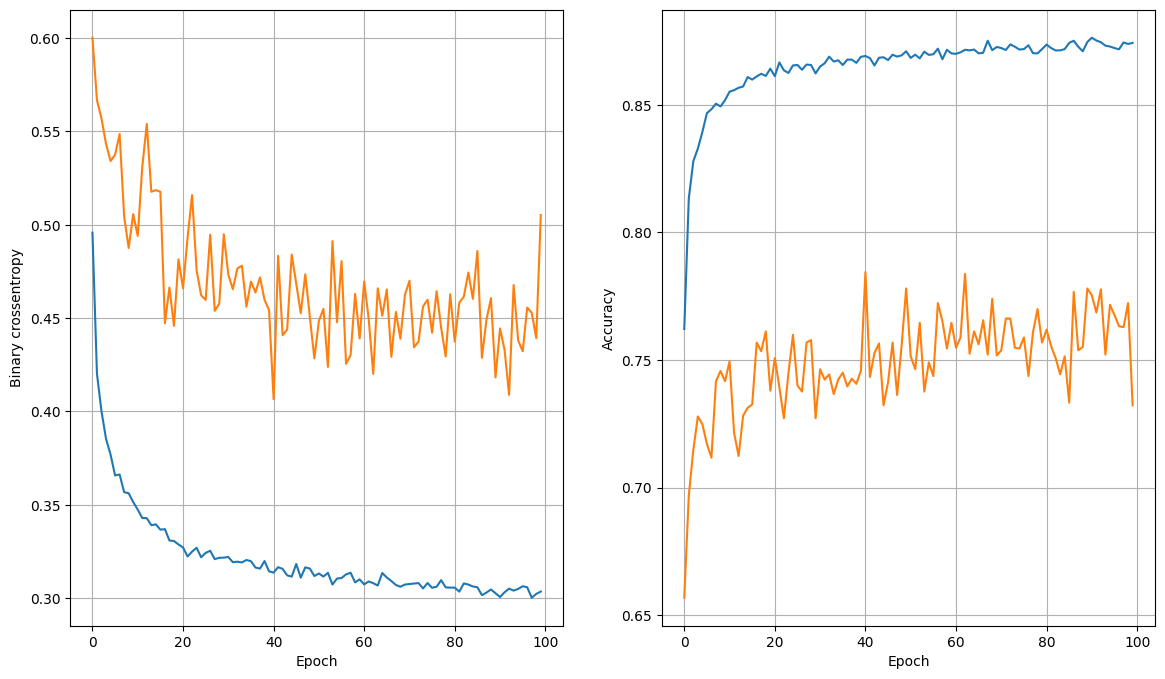

156/156 [==============================] - 1s 5ms/step - loss: 0.3612 - accuracy: 0.8364
<class 'list'>
32 nodes, dropout 0.2, lr 0.001, batch size 64


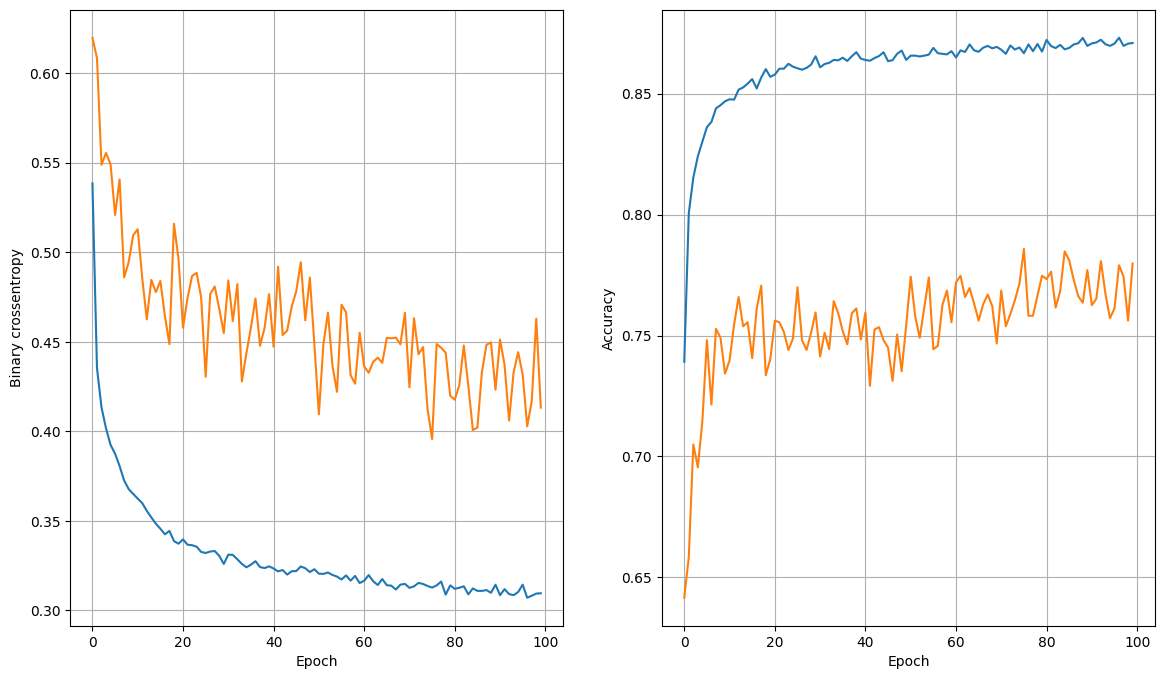

156/156 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8533
<class 'list'>
32 nodes, dropout 0.2, lr 0.001, batch size 128


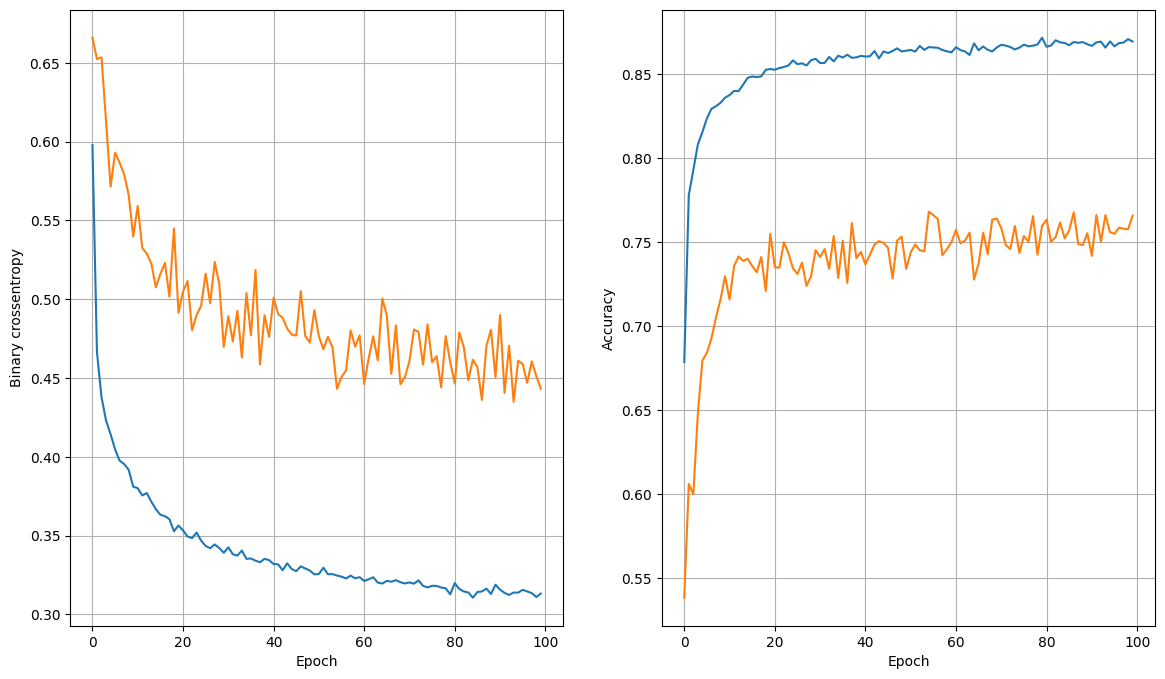

156/156 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8466
<class 'list'>
64 nodes, dropout 0, lr 0.01, batch size 32


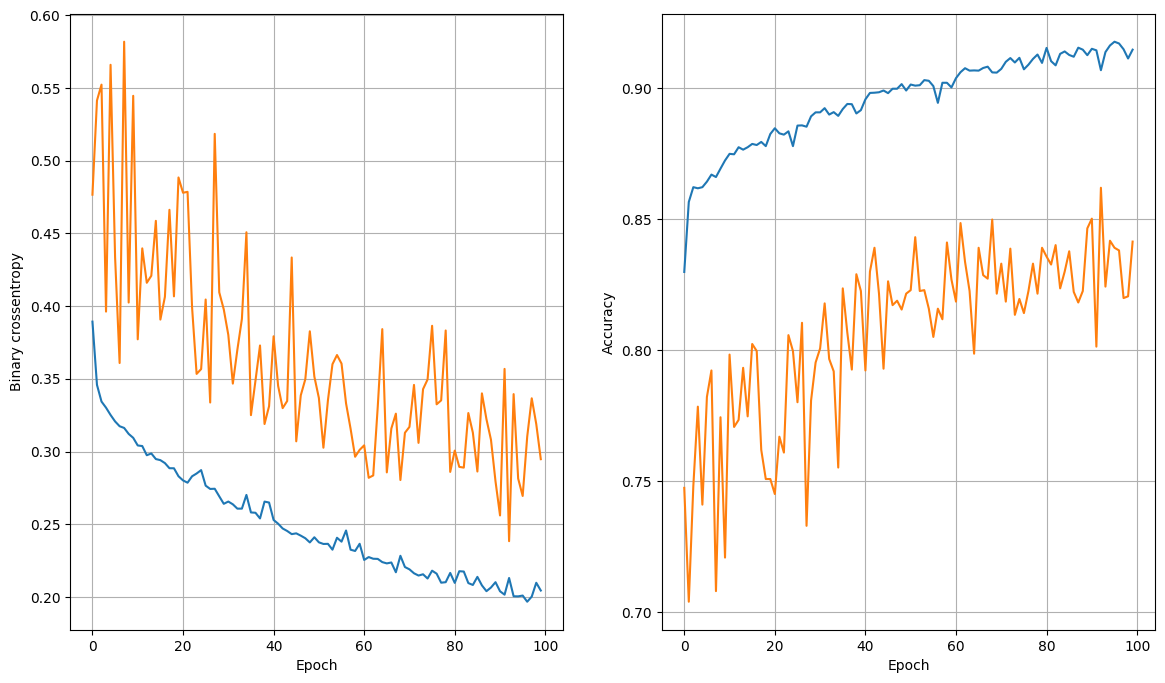

156/156 [==============================] - 1s 3ms/step - loss: 0.5437 - accuracy: 0.8438
<class 'list'>
64 nodes, dropout 0, lr 0.01, batch size 64


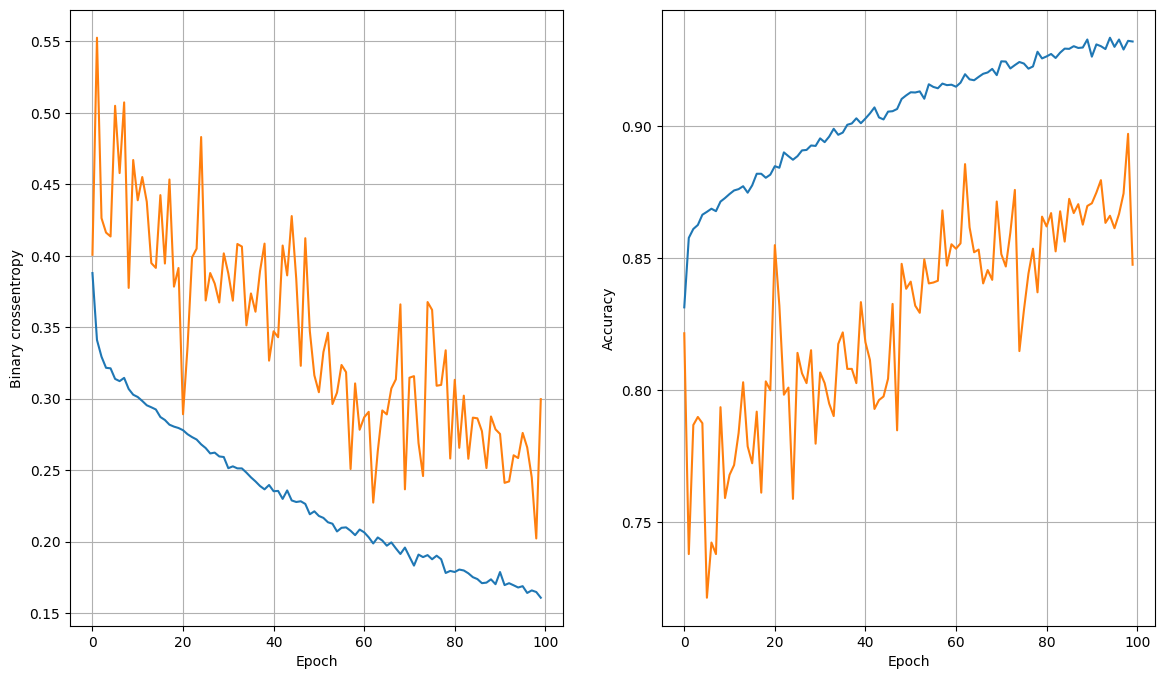

156/156 [==============================] - 1s 4ms/step - loss: 0.6073 - accuracy: 0.8440
<class 'list'>
64 nodes, dropout 0, lr 0.01, batch size 128


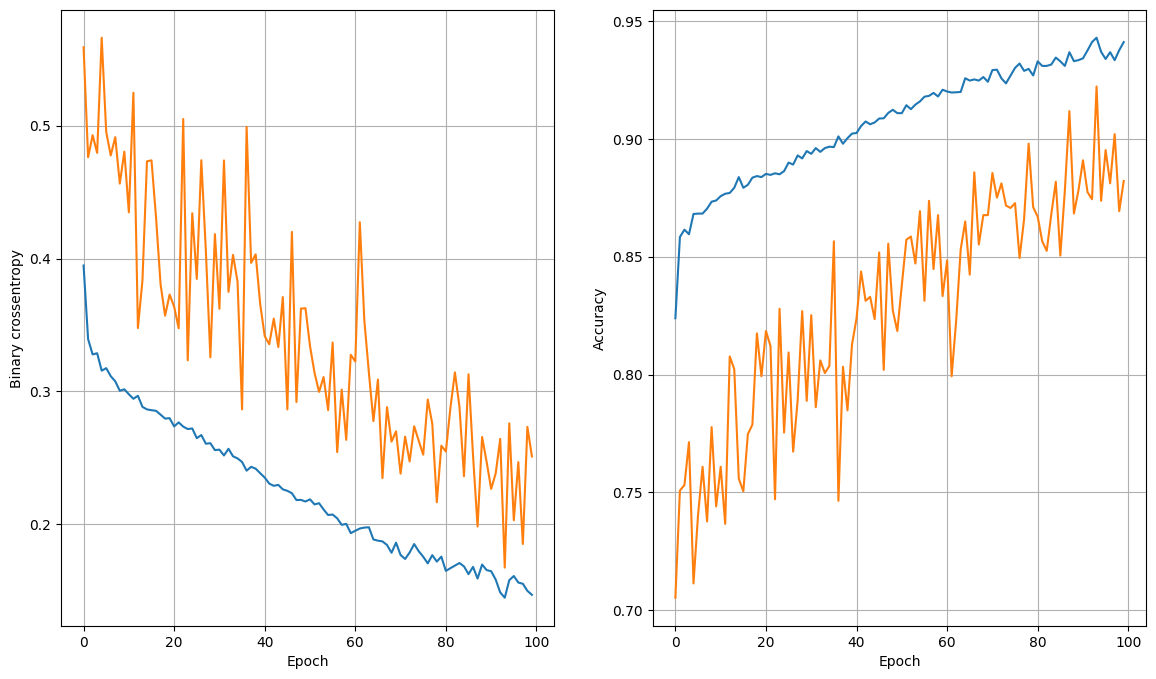

156/156 [==============================] - 1s 3ms/step - loss: 0.6056 - accuracy: 0.8462
<class 'list'>
64 nodes, dropout 0, lr 0.005, batch size 32


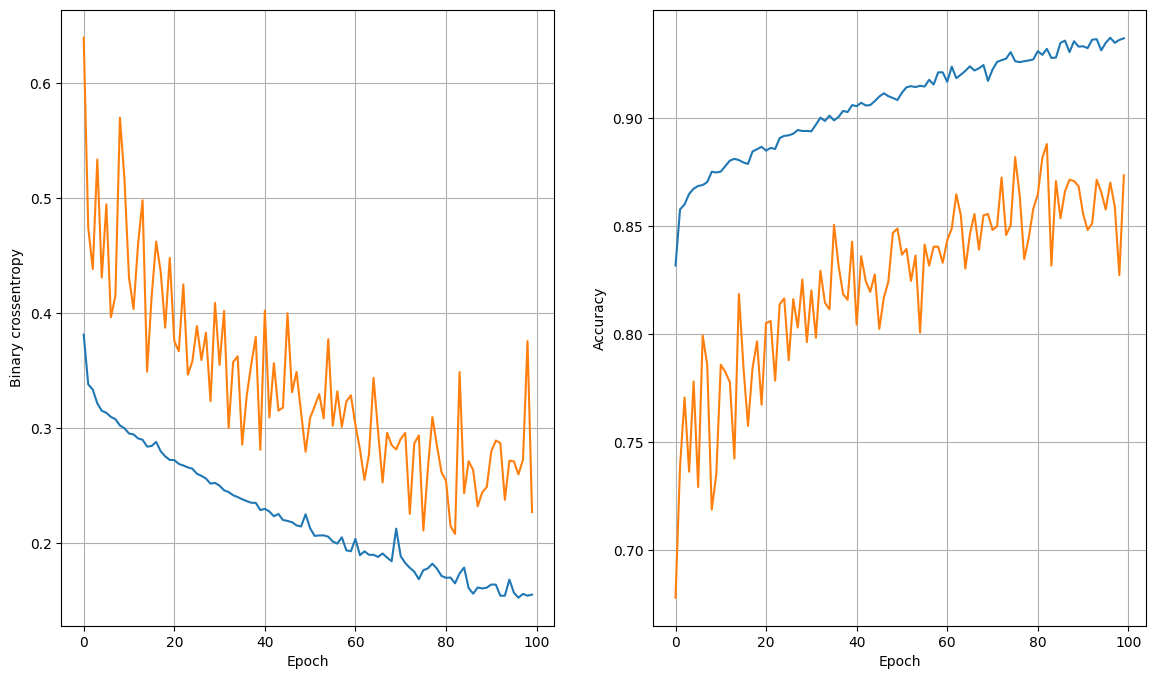

156/156 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.8422
<class 'list'>
64 nodes, dropout 0, lr 0.005, batch size 64


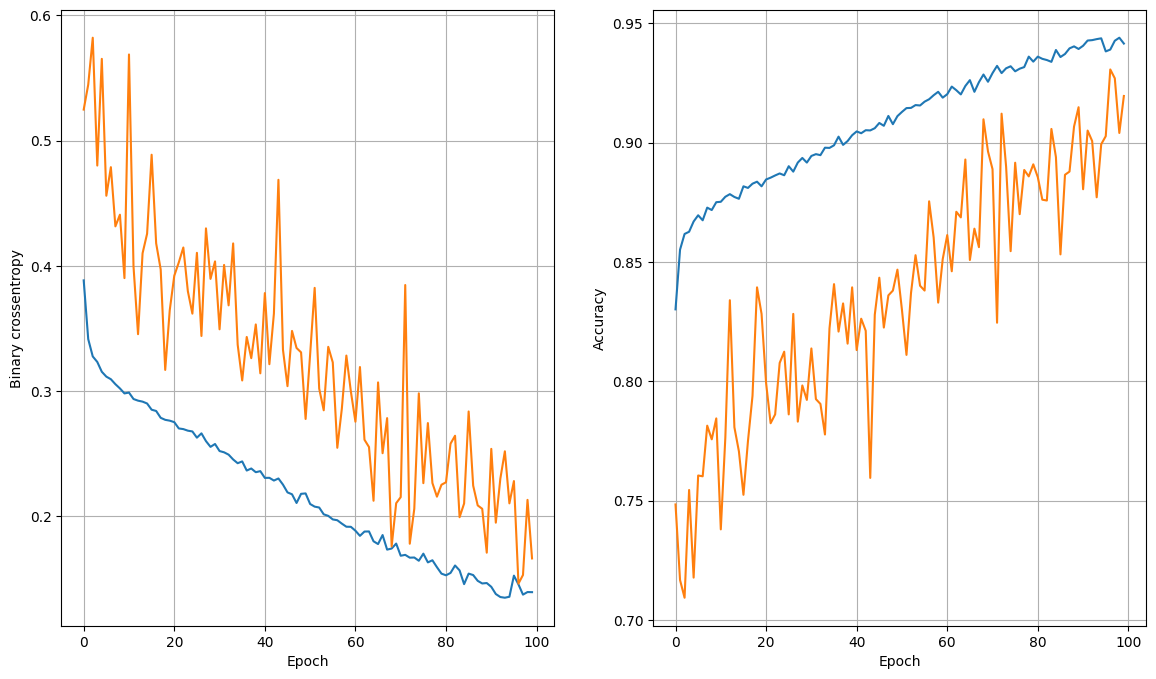

156/156 [==============================] - 1s 3ms/step - loss: 0.6447 - accuracy: 0.8390
<class 'list'>
64 nodes, dropout 0, lr 0.005, batch size 128


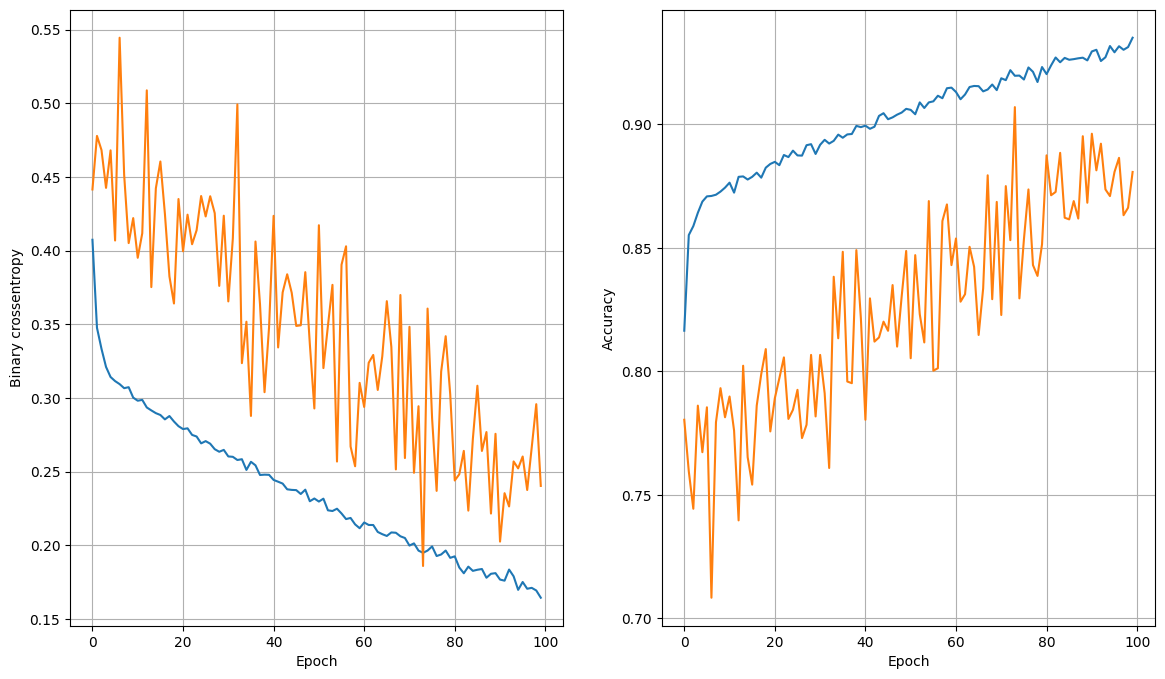

156/156 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.8498
<class 'list'>
64 nodes, dropout 0, lr 0.001, batch size 32


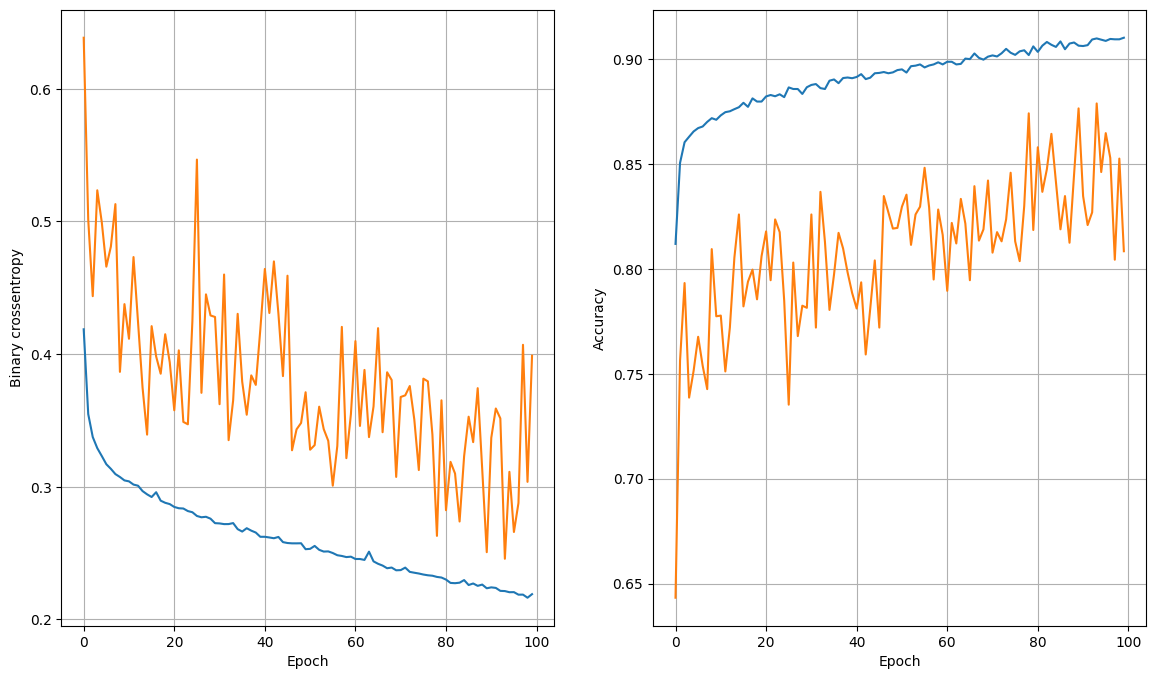

156/156 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8450
<class 'list'>
64 nodes, dropout 0, lr 0.001, batch size 64


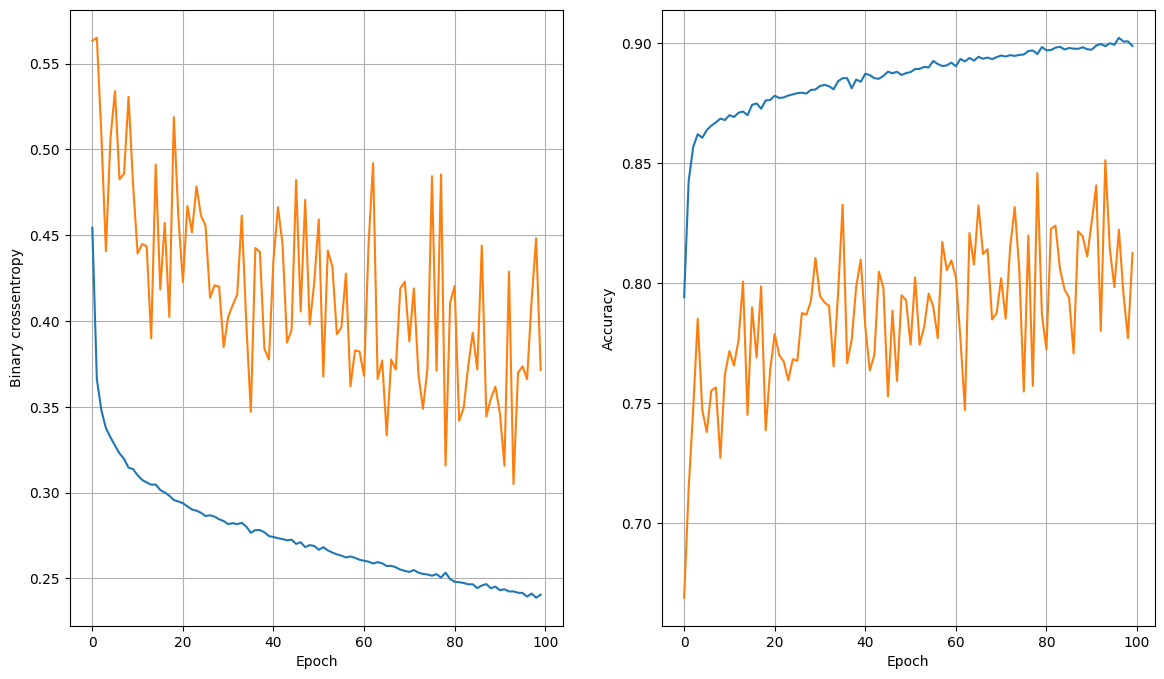

156/156 [==============================] - 1s 3ms/step - loss: 0.3753 - accuracy: 0.8569
<class 'list'>
64 nodes, dropout 0, lr 0.001, batch size 128


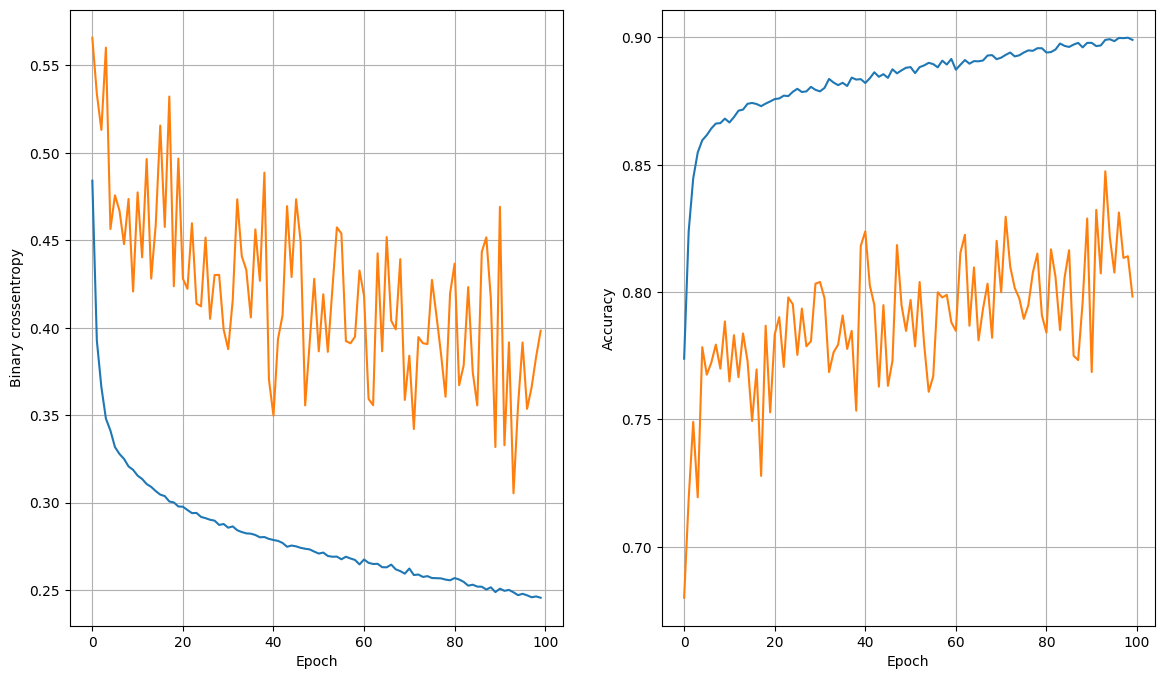

156/156 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8529
<class 'list'>
64 nodes, dropout 0.2, lr 0.01, batch size 32


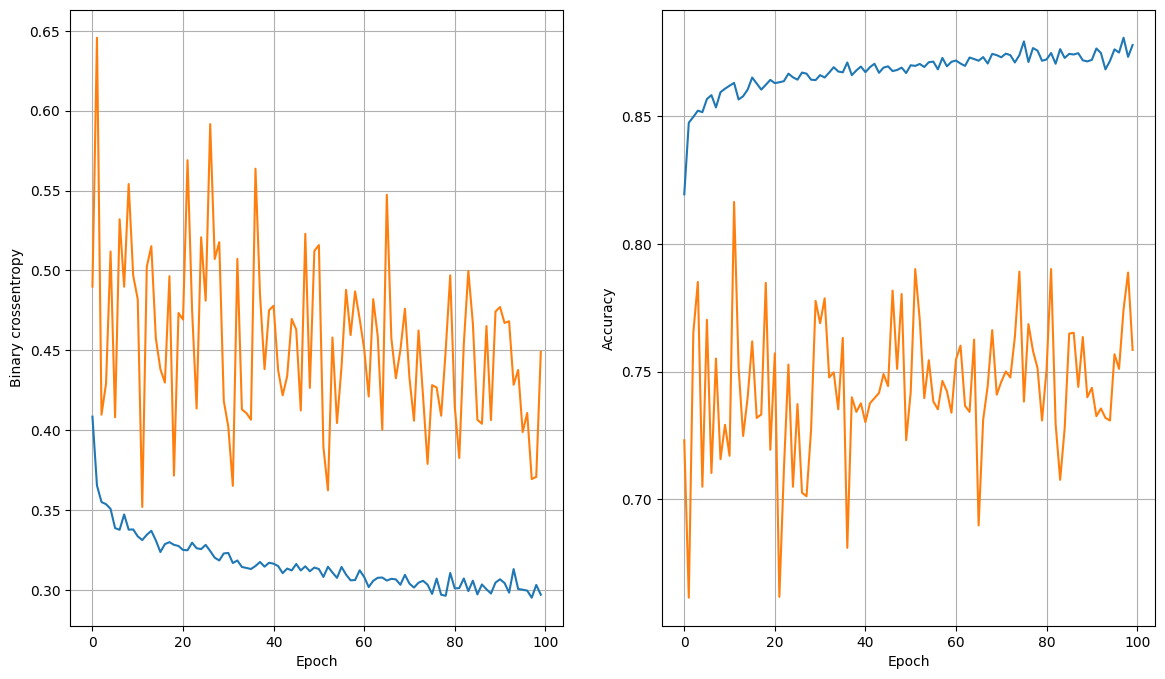

156/156 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8462
<class 'list'>
64 nodes, dropout 0.2, lr 0.01, batch size 64


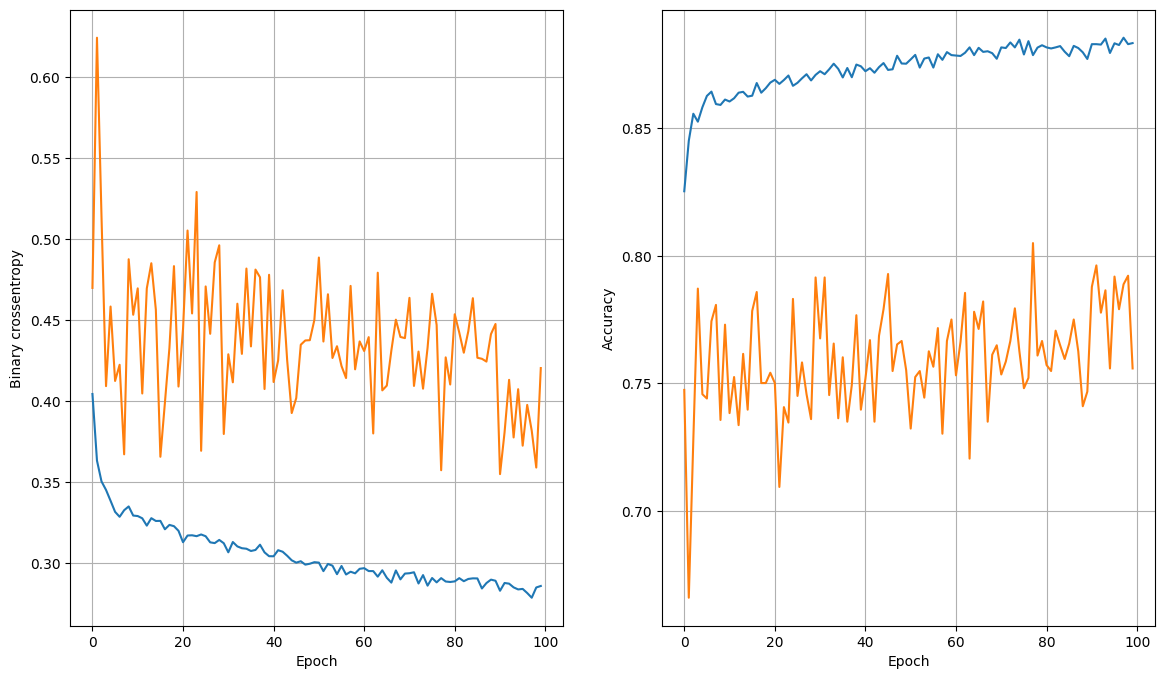

156/156 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8424
<class 'list'>
64 nodes, dropout 0.2, lr 0.01, batch size 128


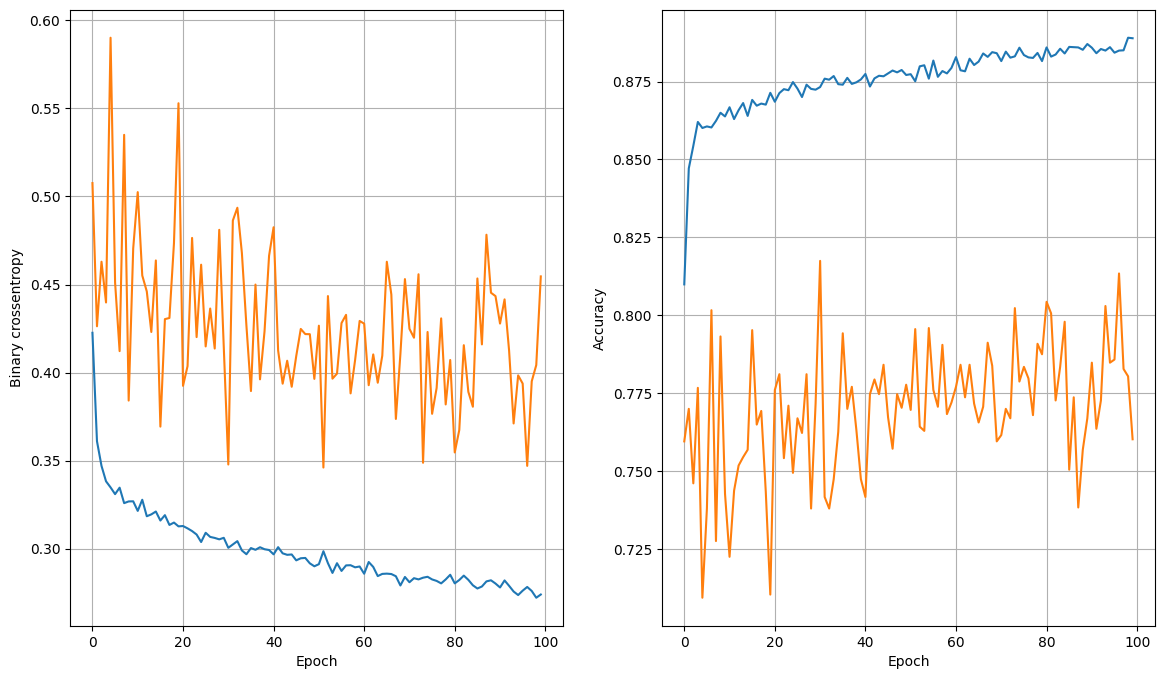

156/156 [==============================] - 1s 4ms/step - loss: 0.3610 - accuracy: 0.8464
<class 'list'>
64 nodes, dropout 0.2, lr 0.005, batch size 32


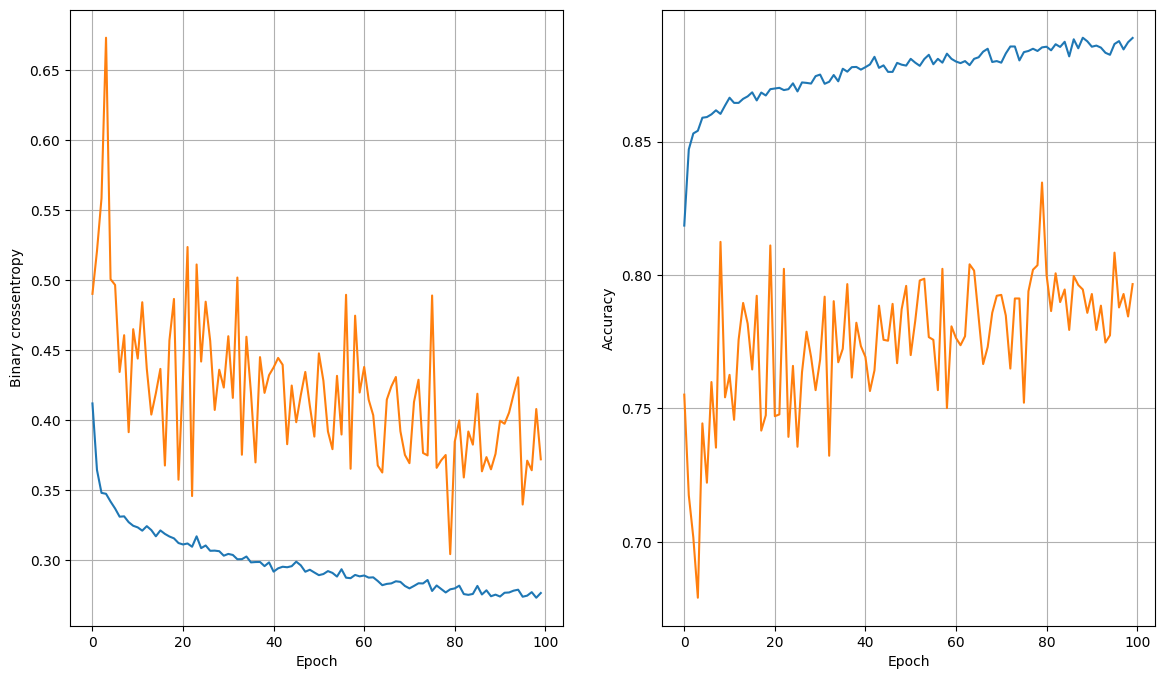

156/156 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8514
<class 'list'>
64 nodes, dropout 0.2, lr 0.005, batch size 64


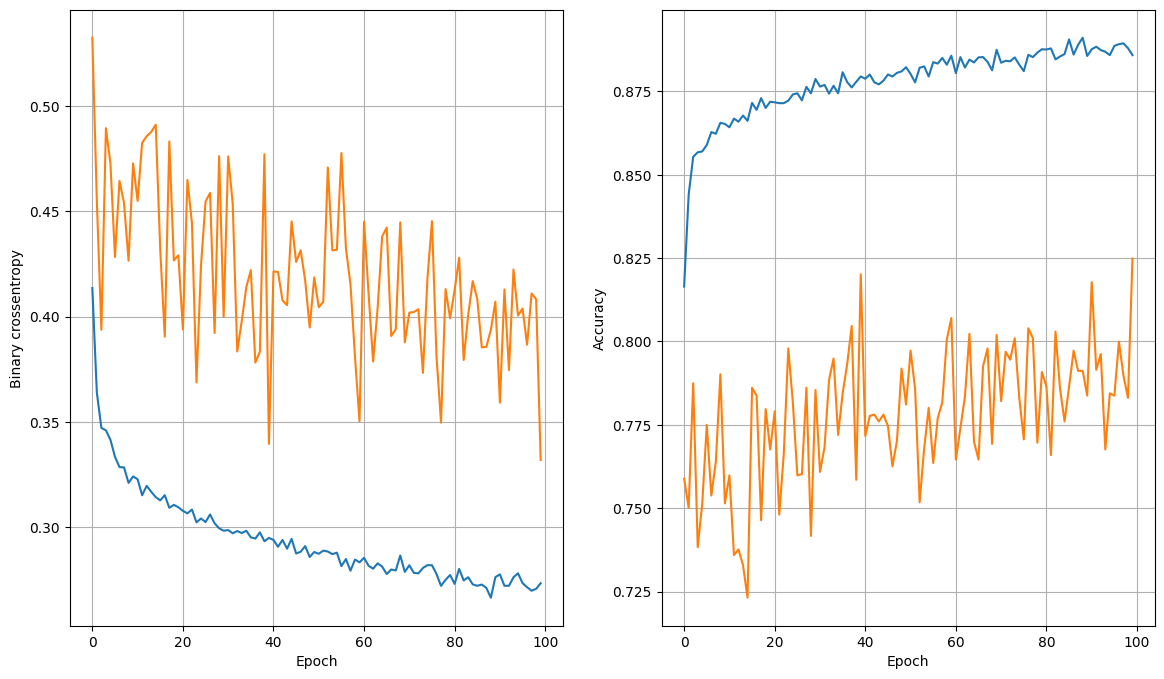

156/156 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8647
<class 'list'>
64 nodes, dropout 0.2, lr 0.005, batch size 128


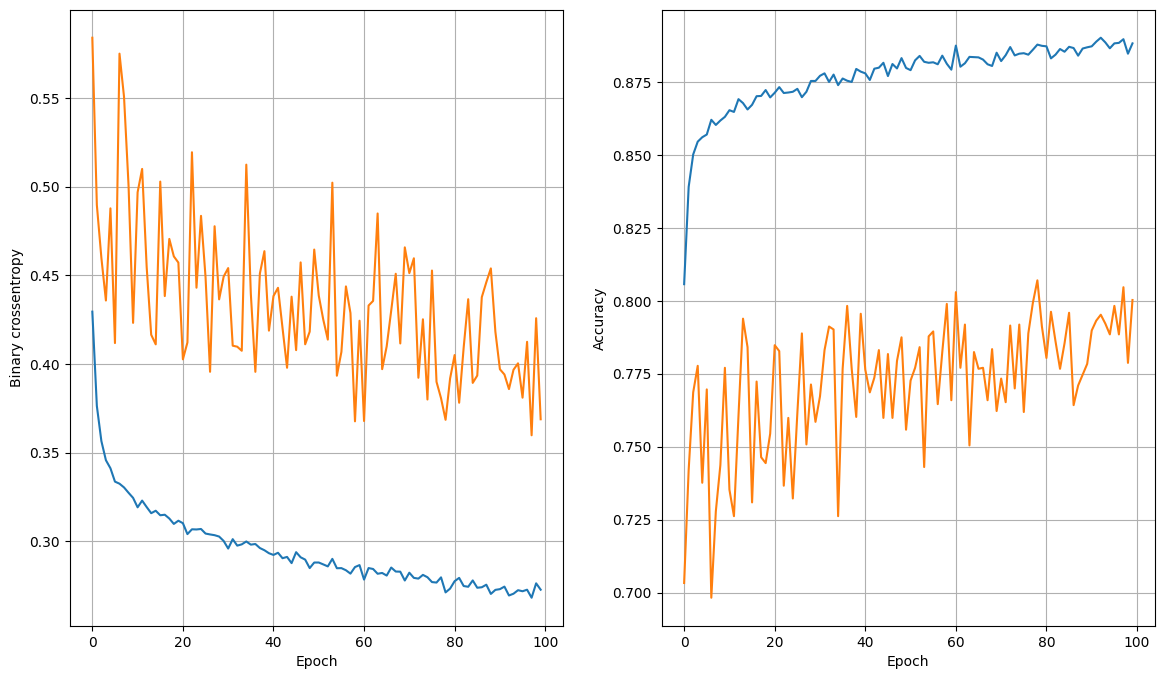

156/156 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8543
<class 'list'>
64 nodes, dropout 0.2, lr 0.001, batch size 32


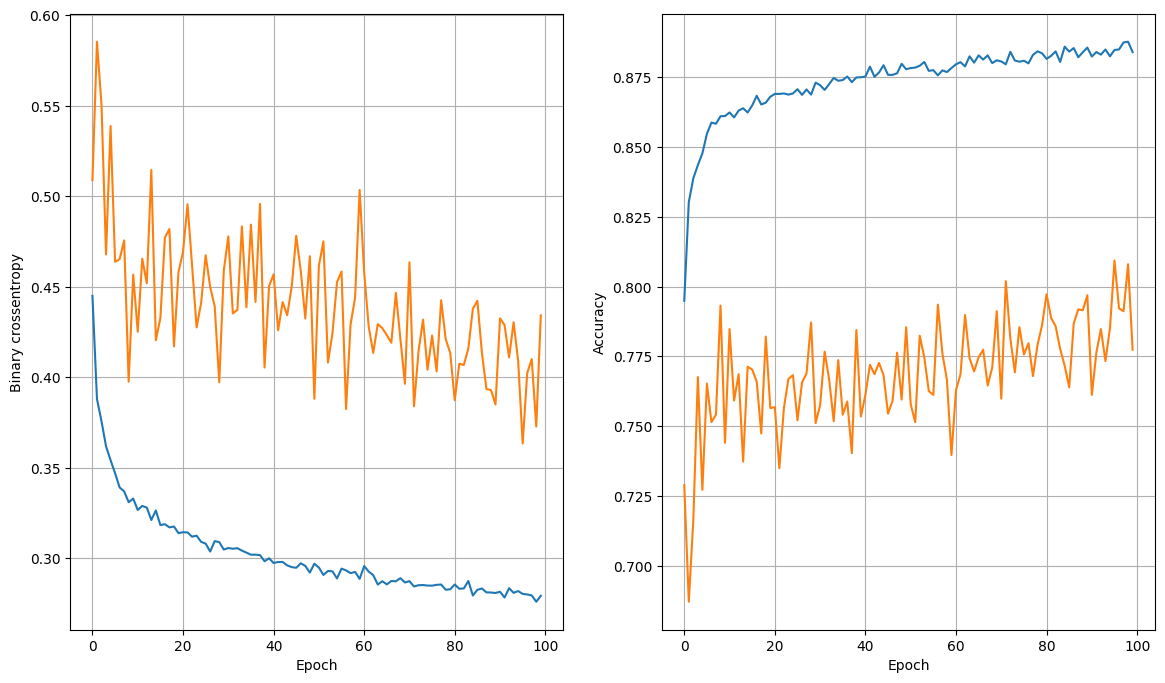

156/156 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8500
<class 'list'>
64 nodes, dropout 0.2, lr 0.001, batch size 64


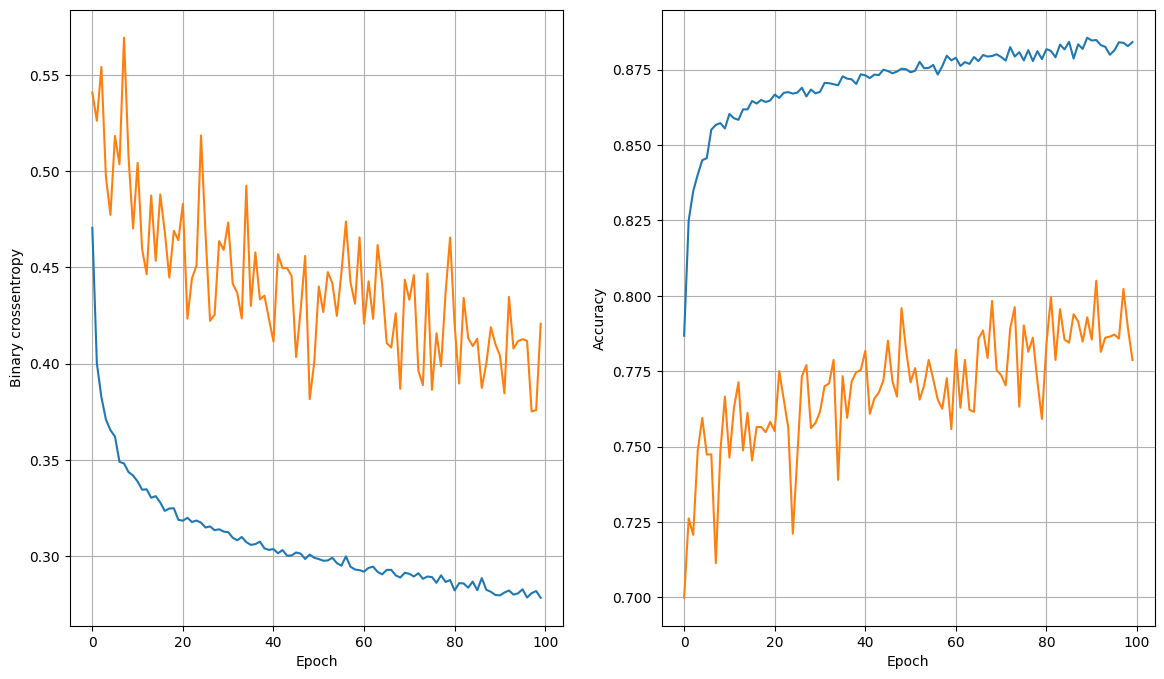

156/156 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8539
<class 'list'>
64 nodes, dropout 0.2, lr 0.001, batch size 128


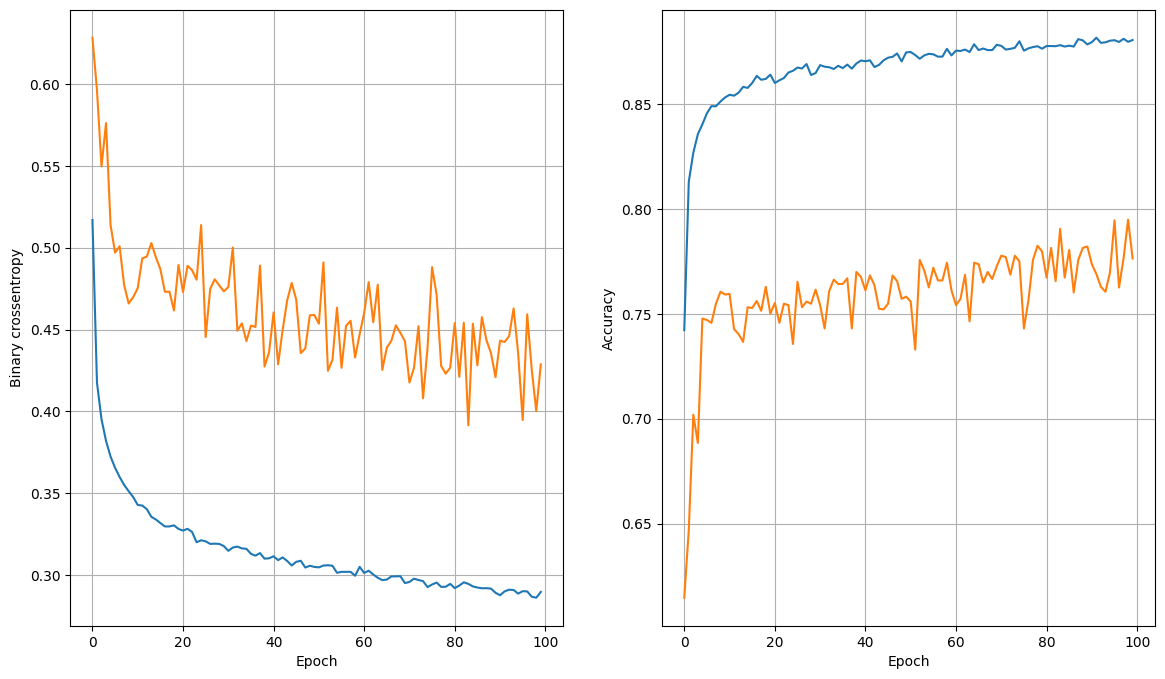

156/156 [==============================] - 0s 3ms/step - loss: 0.3430 - accuracy: 0.8508
<class 'list'>


In [66]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        print(type(val_loss))
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_loss_model = model


In [68]:
 y_pred = least_loss_model.predict(X_test)
 y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 5ms/step


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1377
           1       0.88      0.93      0.90      2427

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

